<div style="background-color:#0C2E59;" >
<p style="margin: auto; padding: 20px;text-align:center; color:#fff;font-size:22px; ">ANALYSE DES VENTES : LIBRAIRIE LAPAGE</p>
</div>

<div style="background:#FFEEDA;padding:10px;">
    <p> <strong><span style="font-size:18px;">OBJECTIF DE CE NOTEBOOK :</span>
<br/>Analysez les ventes en ligne de la librairie Lapage</strong><br/>Faire le point global sur les différents indicateurs et chiffres clés de l’entreprise.
    </p>
    
<br/>    

<strong style="font-size:18px;">PARTIE 1 : Analyse des différents indicateurs de vente</strong>
<br/>
<ul><strong>Évolution dans le temps du chiffre d'affaires</strong>
<li style="margin-left:15px;">Chiffre d’affaires avec la moyenne mobile  </li>
<li style="margin-left:15px;">Chiffre d’affaires par catégorie  </li>
<li style="margin-left:15px;">Nombre de clients par mois  </li>
<li style="margin-left:15px;">Nombre de transactions  </li>
<li style="margin-left:15px;">Nombre de produits vendus  </li>
<li style="margin-left:15px;">Etc.</li>
</ul>


<ul><strong>Zoom sur les références</strong>
<li style="margin-left:15px;">Les tops  </li>
<li style="margin-left:15px;">Les flops  </li>
<li style="margin-left:15px;">La répartition par catégorie </li> 
<li style="margin-left:15px;">Etc.</li>
</ul>


<ul><strong>Profils des clients</strong>
<li style="margin-left:15px;">Répartition du chiffre d'affaire pour les clients BtoB  </li>
<li style="margin-left:15px;">Courbe de Lorenz  </li>
</ul>

<br/>    
<strong style="font-size:18px;">PARTIE 2 : Analyses ciblées</strong>

<ul><strong>Analyse des corrélations</strong>
<li style="margin-left:15px;">Lien entre le genre d’un client et les catégories des livres achetés</li>  
<li style="margin-left:15px;">Lien entre l'âge des clients et le montant total des achats</li>  
<li style="margin-left:15px;">Lien entre l'âge des clients et la fréquence d’achat  </li>
<li style="margin-left:15px;">Lien entre l'âge des clients et la taille du panier moyen  </li>
<li style="margin-left:15px;">Lien entre l'âge des client et la catégorie des livres achetés</li>
</ul>    

<br/>    
<p>Pour plus de clarté le nettoyage de données a été traité dans un autre notebook.<br/>Notebook avec les analyses : <a href="./RIVIERE_Aurelie_2_Nettoyage-Donnees_012025.ipynb" target="_blank">Notebook Nettoyage</a>
</p>
</div>

<div style="background-color:#638BC9;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie Numpy
import numpy as np

In [2]:
#Importation de la librairie matplotlib pour afficher des graphiques
import matplotlib.pyplot as plt 

#Importation de la librairie Seaborn pour afficher des graphiques esthétique
import seaborn as sns

#Importation de la librairie plotly express
#Cette bibliothèque permet de créer des graphiques interactifs
import plotly.express as px

In [3]:
#Importation de la librairie Tabulate
#Bibliothèque permettant l'affichage sous forme de tableau
from tabulate import tabulate

In [4]:
#Librairie de manipulation des dates
from datetime import datetime

#Librairie permettant le traitement des expressions régulières
import re

In [5]:
#Importation de la bibliothèque de widgets javascript
from ipywidgets import widgets, interact

In [6]:
#Importation des bibliothèques de tests statistiques
from scipy.stats import chi2_contingency
from scipy.stats import kstest
from scipy.stats import norm
from scipy.stats import spearmanr
from scipy.stats import levene
from scipy.stats import kruskal

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">1.2 - Chargement des fichiers</h3>
</div>

In [7]:
#Importation du fichier Clients
df_customers = pd.read_csv("data/customers-propre.csv", sep=';')

#Importation du fichier Produits
df_products = pd.read_csv("data/products-propre.csv", sep=';')

#Importation du fichier Transactions
df_transactions = pd.read_csv("data/transactions-propre.csv", sep=';')

In [8]:
#Afficher les 5 premières lignes du dataframe clients
df_customers.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [9]:
#Afficher les 5 premières lignes du dataframe produits
df_products.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [10]:
df_transactions.head()

id_prod                        date session_id client_id
0  0_1259  2021-03-01 00:01:07.843138        s_1     c_329
1  0_1390  2021-03-01 00:02:26.047414        s_2     c_664
2  0_1352  2021-03-01 00:02:38.311413        s_3     c_580
3  0_1458  2021-03-01 00:04:54.559692        s_4    c_7912
4  0_1358  2021-03-01 00:05:18.801198        s_5    c_2033

<div style="background-color:#638BC9;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 2 - Analyse des différents indicateurs de vente</h2>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.1 - Évolution dans le temps du chiffre d'affaire</h3>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.1.1 - Fusion des dataframes transcations et produits</h4>
</div>

<div style="background:#FFEEDA;padding:10px;">
On fusionne les dataframes transactions et produits afin de définir le chiffres d'affaires et les périodes associées.
</div>

In [11]:
#Calcul de la période couverte par les données
date_min = df_transactions['date'].min()
date_max = df_transactions['date'].max()
date_min, date_max

('2021-03-01 00:01:07.843138', '2023-02-28 23:58:30.792755')

<div style="background:#FFEEDA;padding:10px;">
La période observée s'étend du <strong>1 mars 2021</strong> au <strong>28 février 2023</strong>.
</div>

In [12]:
#Joindre les dataframes produits et transcations
df_transactions_detaillees = pd.merge(df_transactions, df_products, on='id_prod', how='left')

# Vérifier les transactions sans correspondance (colonnes issues de df_products sont NaN)
transactions_non_associees = df_transactions_detaillees[df_transactions_detaillees['price'].isna() | df_transactions_detaillees['categ'].isna()]

# Afficher les transactions non associées
print("Transactions non associées :")
print(transactions_non_associees)

# Compter le nombre de transactions non associées
print(f"Nombre de transactions non associées : {len(transactions_non_associees)}")

Transactions non associées :
Empty DataFrame
Columns: [id_prod, date, session_id, client_id, price, categ]
Index: []
Nombre de transactions non associées : 0


In [13]:
# Conversion de la colonne 'date' en datetime
df_transactions_detaillees['date'] = pd.to_datetime(df_transactions_detaillees['date'], errors='coerce')

# Ajouter une colonne pour les mois au format MM-YYYY
df_transactions_detaillees['month'] = df_transactions_detaillees['date'].dt.to_period('M')

In [14]:
df_transactions_detaillees.head()

id_prod                       date session_id client_id  price  categ  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329  11.99      0   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664  19.37      0   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   4.50      0   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   6.55      0   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  16.49      0   

     month  
0  2021-03  
1  2021-03  
2  2021-03  
3  2021-03  
4  2021-03

In [15]:
# Faire un group by sur le mois et calculer la somme des prix (chiffre d'affaires)
df_ca_mensuel = df_transactions_detaillees.groupby('month')['price'].sum().reset_index()

# Réorganiser le DataFrame par ordre chronologique
df_ca_mensuel = df_ca_mensuel.sort_values(by='month')

# Renommer la colonne 'price' en 'CA_mensuel'
df_ca_mensuel.rename(columns={'price': 'CA_mensuel'}, inplace=True)

# Afficher les premières lignes du DataFrame
df_ca_mensuel.head(24)

month  CA_mensuel
0   2021-03   482440.61
1   2021-04   476109.30
2   2021-05   492943.47
3   2021-06   484088.56
4   2021-07   482835.40
5   2021-08   482284.79
6   2021-09   507240.68
7   2021-10   494733.16
8   2021-11   516167.73
9   2021-12   525917.28
10  2022-01   525338.99
11  2022-02   535571.50
12  2022-03   515456.53
13  2022-04   492998.94
14  2022-05   517132.60
15  2022-06   496016.12
16  2022-07   510783.12
17  2022-08   506467.27
18  2022-09   494114.53
19  2022-10   507917.77
20  2022-11   496664.94
21  2022-12   510219.50
22  2023-01   517540.55
23  2023-02   456679.76

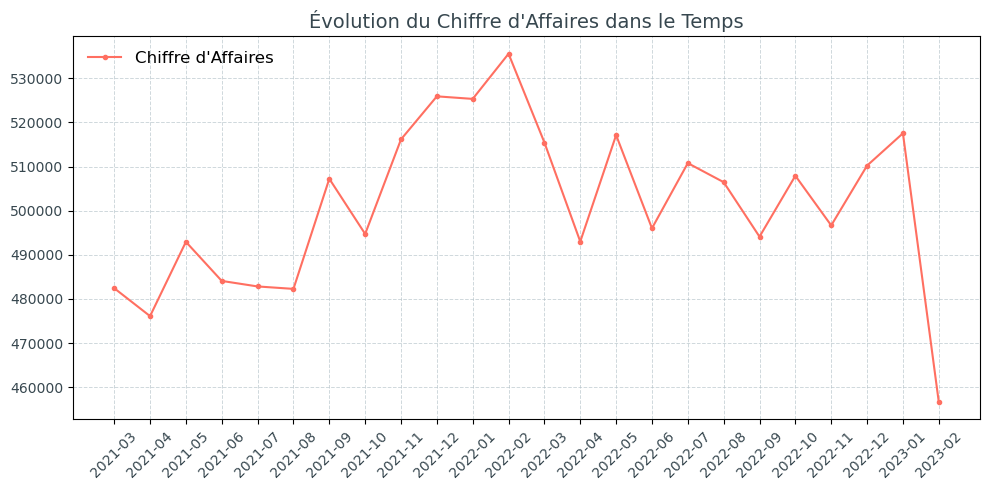

In [16]:
# graphique de l'évolution du CA dans le temps

# Configuration de la figure
plt.figure(figsize=(10, 5))

# Traçage des données avec un thème amélioré
plt.plot(
    df_ca_mensuel['month'].astype(str),
    df_ca_mensuel['CA_mensuel'],
    marker='.',
    color='#FF6F61',  # Couleur de la ligne
    linestyle='-',
    label='Chiffre d\'Affaires'
)

# Titres et labels
plt.title('Évolution du Chiffre d\'Affaires dans le Temps', fontsize=14, color='#37474F')  # Couleur du titre
plt.xticks(rotation=45, fontsize=10, color='#37474F')  # Taille de la police et rotation des mois
plt.yticks(fontsize=10, color='#37474F')

# Personnalisation de la grille
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='#B0BEC5')  # Grille en gris doux

# Ajout de la légende
plt.legend(loc='upper left', fontsize=12, frameon=False, facecolor='#ECEFF1')

# Ajustement de la mise en page
plt.tight_layout()

# Affichage
plt.show()

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.1.3 - Évolution du chiffre d'affaire avec la moyenne mobile</h4>
</div>

In [17]:
# Calculer la moyenne mobile
df_ca_mensuel['moyenne mobile'] = df_ca_mensuel['CA_mensuel'].rolling(window=3, min_periods=1).mean()

print(df_ca_mensuel)

      month  CA_mensuel  moyenne mobile
0   2021-03   482440.61   482440.610000
1   2021-04   476109.30   479274.955000
2   2021-05   492943.47   483831.126667
3   2021-06   484088.56   484380.443333
4   2021-07   482835.40   486622.476667
5   2021-08   482284.79   483069.583333
6   2021-09   507240.68   490786.956667
7   2021-10   494733.16   494752.876667
8   2021-11   516167.73   506047.190000
9   2021-12   525917.28   512272.723333
10  2022-01   525338.99   522474.666667
11  2022-02   535571.50   528942.590000
12  2022-03   515456.53   525455.673333
13  2022-04   492998.94   514675.656667
14  2022-05   517132.60   508529.356667
15  2022-06   496016.12   502049.220000
16  2022-07   510783.12   507977.280000
17  2022-08   506467.27   504422.170000
18  2022-09   494114.53   503788.306667
19  2022-10   507917.77   502833.190000
20  2022-11   496664.94   499565.746667
21  2022-12   510219.50   504934.070000
22  2023-01   517540.55   508141.663333
23  2023-02   456679.76   494813.270000


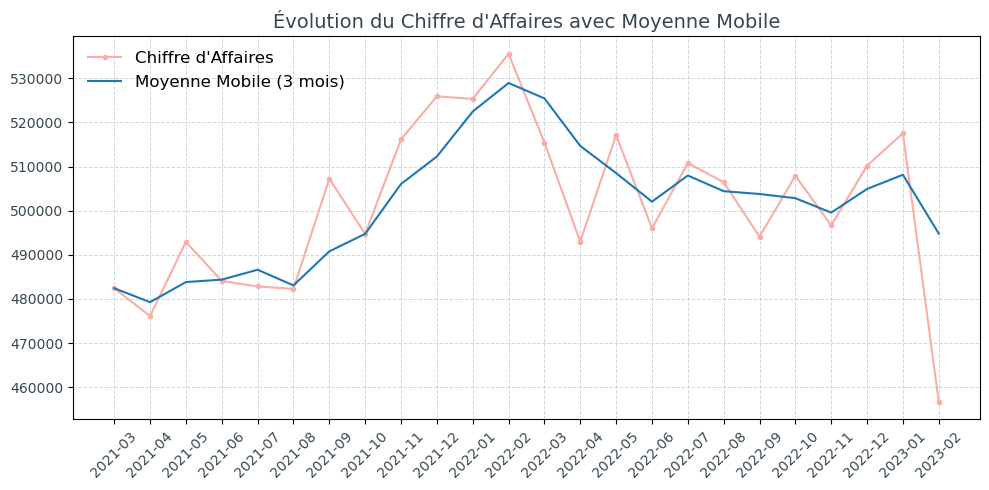

In [18]:
#Graphique de l'évolution de la moyenne mobile combiné à l'évolution du CA

# Configuration de la figure
plt.figure(figsize=(10, 5))

# Tracer la courbe du chiffre d'affaires
plt.plot(
    df_ca_mensuel['month'].astype(str),
    df_ca_mensuel['CA_mensuel'],
    marker='.',
    color='#faada6',
    linestyle='-',
    label='Chiffre d\'Affaires'
)

# Tracer la courbe de la moyenne mobile
plt.plot(
    df_ca_mensuel['month'].astype(str),
    df_ca_mensuel['moyenne mobile'],
    color='#1f77b4',  
    linestyle='-',
    label='Moyenne Mobile (3 mois)'
)

# Ajouter des titres et des labels
plt.title('Évolution du Chiffre d\'Affaires avec Moyenne Mobile', fontsize=14, color='#37474F')
plt.xticks(rotation=45, fontsize=10, color='#37474F')  
plt.yticks(fontsize=10, color='#37474F')

# Personnalisation de la grille
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='#B0BEC5')

# Ajouter la légende
plt.legend(loc='upper left', fontsize=12, frameon=False, facecolor='#ECEFF1')

# Ajustement de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

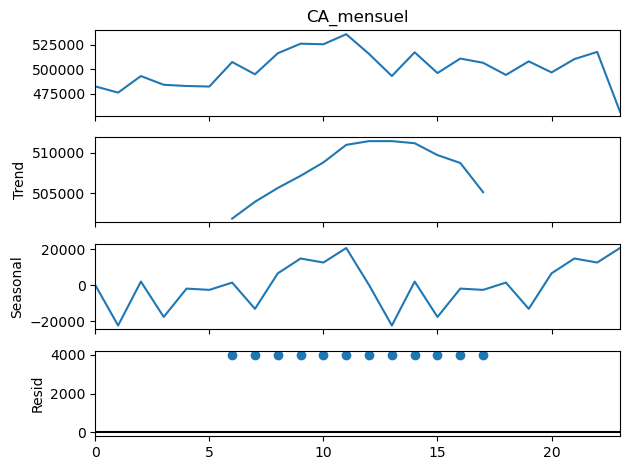

In [19]:
# Décomposition de la série temporelle
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_ca_mensuel['CA_mensuel'], model='additive', period=12)

# Graphique de la décomposition
result.plot()
plt.tight_layout()
plt.show()

<div style="background:#FFEEDA;padding:10px;">
  <ul>
      <li>La Tendance représente l'évolution générale du chiffre d'affaires sur la période.</li>
      <li>La Saisonnalité montre les variations cycliques récurrentes mois après mois</li>
      <li>Le Résidu représente les écarts imprévus, c'est-à-dire ce qui n'est pas expliqué par la tendance ni la saisonnalité.</li>
    </ul>
</div>

<div style="background:#FFEEDA;padding:10px;">
  <strong>Note : </strong>La décomposition en moyenne mobile donne un éclairage nouveau sur l'analyse du CA.
La tendance est plus clair avec une augmentation sur toute la première période suivit d'une décroissance du CA.
Mais on observe aussi une saisonnalité qui peut venir expliquer la chute du CA sur le dernier mois.
</div>

In [20]:
# Afficher les premières valeurs des composantes pour vérifier
print("Tendance (Trend):\n", result.trend.head(25))
print("\nSaisonnalité (Seasonal):\n", result.seasonal.head(25))
print("\nRésidu (Residual):\n", result.resid.head(25))

Tendance (Trend):
 0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6     501848.285833
7     503927.684167
8     505639.299583
9     507144.161667
10    508805.631667
11    510977.723333
12    511438.403750
13    511440.839583
14    511177.582083
15    509710.891667
16    508731.882500
17    505119.791667
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
Name: trend, dtype: float64

Saisonnalité (Seasonal):
 0        29.647708
1    -22430.378125
2      1966.539375
3    -17683.250208
4     -1937.241042
5     -2641.000208
6      1403.915625
7    -13183.002708
8      6539.951875
9     14784.639792
10    12544.879792
11    20605.298125
12       29.647708
13   -22430.378125
14     1966.539375
15   -17683.250208
16    -1937.241042
17    -2641.000208
18     1403.915625
19   -13183.002708
20     6539.951875
21    14784.639792
22    12544.879792
23    206

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.1.4 - Évolution du chiffre d'affaire par catégorie</h4>
</div>

In [21]:
# Regrouper par catégorie et mois, puis calculer la somme des prix
df_categories = df_transactions_detaillees.groupby(['categ', 'month'])['price'].sum().reset_index()

# Trier les données par la colonne 'month'
df_categories = df_categories.sort_values(by='month')

# Afficher le DataFrame
df_categories.head()

categ    month      price
0       0  2021-03  193629.17
48      2  2021-03  101837.27
24      1  2021-03  186974.17
1       0  2021-04  205222.46
49      2  2021-04  114748.49

In [22]:
# Création d'un graphique en courbe dynamique

df_categories['month'] = df_categories['month'].astype(str)

# Créer le graphique avec Plotly Express
fig = px.line(
    df_categories,
    x='month',              # Axe X : les mois
    y='price',              # Axe Y : le chiffre d'affaires
    color='categ',          # Une ligne par catégorie
    title='Évolution du chiffre d\'affaires par catégorie',
    labels={
        'month': ' ',
        'price': ' ',
        'categ': 'Catégorie'
    }
)

# Ajuster l'affichage pour rendre les labels plus lisibles
fig.update_layout(
    xaxis=dict(tickangle=45),  # Rotation des labels des mois
    legend_title_text='Catégorie'
)

# Afficher le graphique
fig.show()

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.1.5 - Évolution du nombre de clients par mois</h4>
</div>

In [23]:
# Calculer le nombre de clients uniques par mois
df_clients_mois = df_transactions_detaillees.groupby('month')['client_id'].nunique().reset_index()

# Renommer les colonnes pour plus de clarté
df_clients_mois.columns = ['month', 'nbre_clients']

df_clients_mois.head(24)

month  nbre_clients
0   2021-03          5676
1   2021-04          5674
2   2021-05          5644
3   2021-06          5659
4   2021-07          5672
5   2021-08          5642
6   2021-09          5693
7   2021-10          6190
8   2021-11          5875
9   2021-12          5867
10  2022-01          5809
11  2022-02          5729
12  2022-03          5835
13  2022-04          5695
14  2022-05          5843
15  2022-06          5717
16  2022-07          5778
17  2022-08          5805
18  2022-09          5738
19  2022-10          5755
20  2022-11          5749
21  2022-12          5765
22  2023-01          5828
23  2023-02          5587

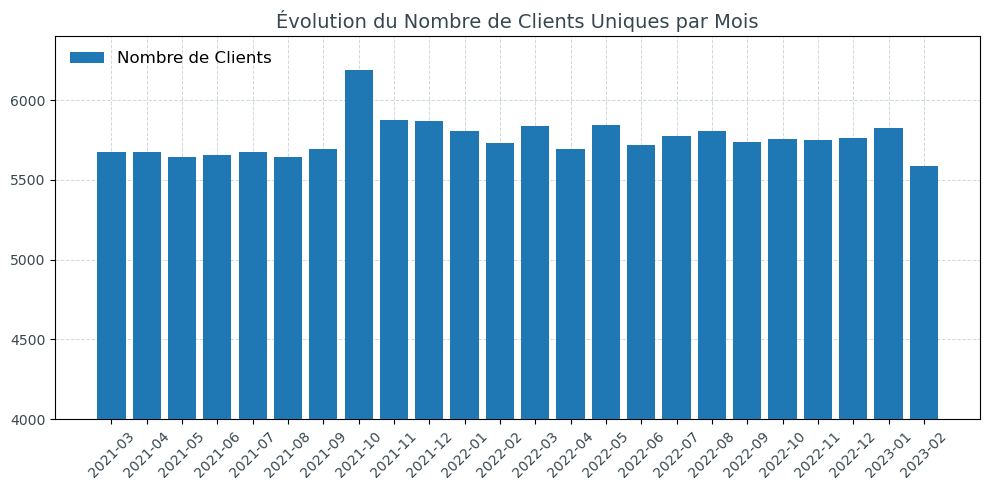

In [24]:
# Graphique évolution du nombre de clients mensuels 

plt.figure(figsize=(10, 5))

# Tracer l'histogramme pour le nombre de clients
plt.bar(
    df_clients_mois['month'].astype(str),
    df_clients_mois['nbre_clients'],
    color='#1f77b4', 
    label='Nombre de Clients',
    zorder=3
)

# Définir les limites de l'axe Y
plt.ylim(4000, 6400)

# Ajouter des titres et des labels
plt.title('Évolution du Nombre de Clients Uniques par Mois', fontsize=14, color='#37474F')
plt.xticks(rotation=45, fontsize=10, color='#37474F')
plt.yticks(fontsize=10, color='#37474F')

# Tracer la grille en arrière-plan
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='#B0BEC5', zorder=0)

# Ajouter la légende
plt.legend(loc='upper left', fontsize=12, frameon=False, facecolor='#ECEFF1')

# Ajustement de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

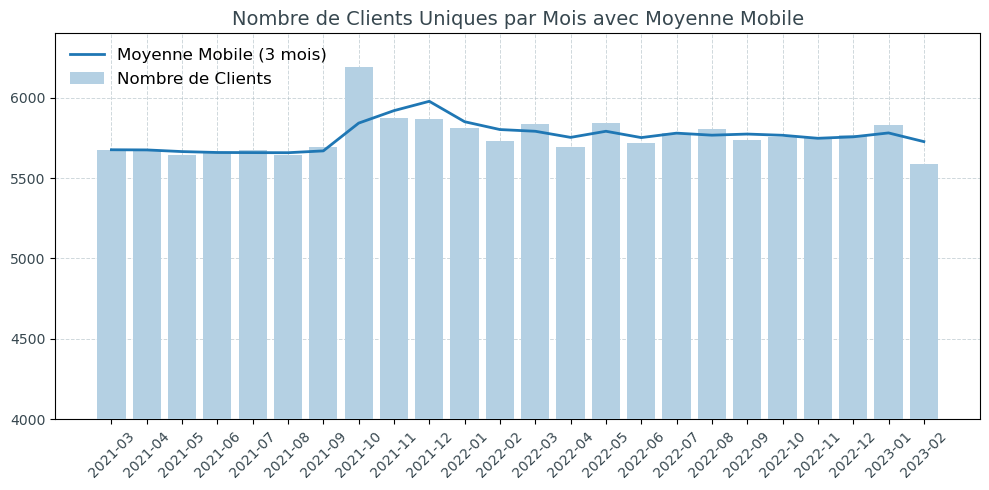

In [25]:
# Graphique évolution du nombre de clients mensuels avec moyenne mobile

plt.figure(figsize=(10, 5))

# Tracer l'histogramme pour le nombre de clients
plt.bar(
    df_clients_mois['month'].astype(str),
    df_clients_mois['nbre_clients'],
    color='#b4d0e3',  
    label='Nombre de Clients',
    zorder=3
)

# Calculer la moyenne mobile
df_clients_mois['rolling_mean'] = df_clients_mois['nbre_clients'].rolling(window=3, min_periods=1).mean()

# Tracer la courbe de la moyenne mobile
plt.plot(
    df_clients_mois['month'].astype(str),
    df_clients_mois['rolling_mean'],
    color='#1f77b4', 
    linestyle='-',
    linewidth=2,
    label='Moyenne Mobile (3 mois)',
    zorder=4
)

# Définir les limites de l'axe Y
plt.ylim(4000, 6400)

# Ajouter des titres et des labels
plt.title('Nombre de Clients Uniques par Mois avec Moyenne Mobile', fontsize=14, color='#37474F')
plt.xticks(rotation=45, fontsize=10, color='#37474F')
plt.yticks(fontsize=10, color='#37474F')

# Tracer la grille en arrière-plan
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='#B0BEC5', zorder=0)

# Ajouter la légende
plt.legend(loc='upper left', fontsize=12, frameon=False, facecolor='#ECEFF1')

# Ajustement de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.1.6 - Evolution du nombre de transactions</h4>
</div>

In [26]:
# Nous considérons une transcation comme une vente (un panier)
# Nous regroupons les sessions clients pour connaitre le nombre et montant de chaque transcation

# Regrouper par session_id et mois, puis calculer la somme des prix
df_session = df_transactions_detaillees.groupby(['session_id', 'month','client_id'])['price'].sum().reset_index()

# Afficher le DataFrame
df_session.head()

session_id    month client_id  price
0        s_1  2021-03     c_329  11.99
1       s_10  2021-03    c_2218  26.99
2      s_100  2021-03    c_3854  33.72
3     s_1000  2021-03    c_1014  39.22
4    s_10000  2021-03     c_476  41.49

In [27]:
# Calculer le nombre de transactions (sessions) par mois
df_transactions_mensuel = df_session.groupby('month')['session_id'].count().reset_index()

# Renommer les colonnes pour plus de clarté
df_transactions_mensuel.columns = ['month', 'nbre_transactions']

# Trier par mois pour garantir un ordre chronologique
df_transactions_mensuel = df_transactions_mensuel.sort_values(by='month')

# Afficher le DataFrame
df_transactions_mensuel.head()

month  nbre_transactions
0  2021-03              14201
1  2021-04              13970
2  2021-05              14168
3  2021-06              13838
4  2021-07              13571

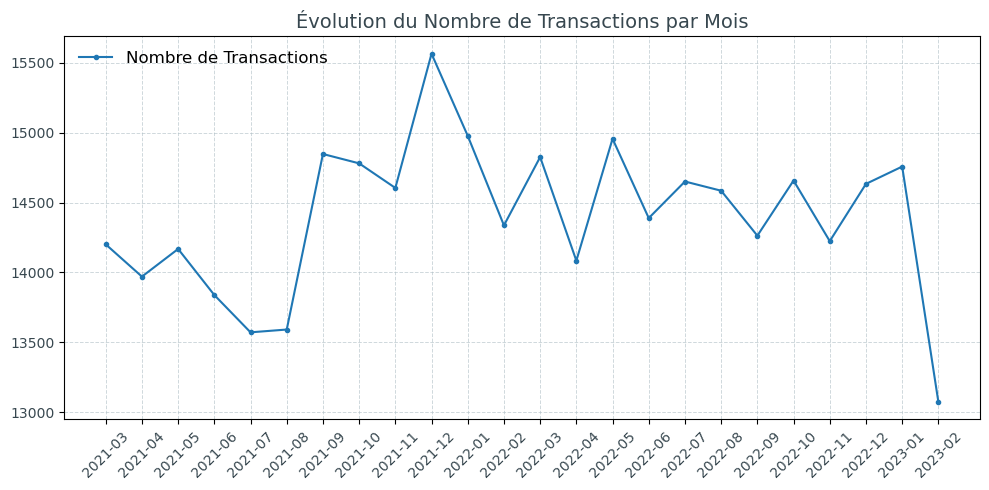

In [28]:
# Graphique de l'évolution du nombre de transactions par mois

plt.figure(figsize=(10, 5))

# Traçage des données avec un thème amélioré
plt.plot(
    df_transactions_mensuel['month'].astype(str),
    df_transactions_mensuel['nbre_transactions'],
    marker='.',
    color='#1f77b4', 
    linestyle='-',
    label='Nombre de Transactions',
    zorder=3
)

# Titres et labels
plt.title('Évolution du Nombre de Transactions par Mois', fontsize=14, color='#37474F')  # Couleur du titre
plt.xticks(rotation=45, fontsize=10, color='#37474F')  # Taille de la police et rotation des mois
plt.yticks(fontsize=10, color='#37474F')

# Tracer la grille en arrière-plan
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='#B0BEC5', zorder=0)

# Ajout de la légende
plt.legend(loc='upper left', fontsize=12, frameon=False, facecolor='#ECEFF1')

# Ajustement de la mise en page
plt.tight_layout()

# Affichage
plt.show()


<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.1.7 - Evolution du nombre de produits vendus</h4>
</div>

In [29]:
# Regrouper par nombre de produits vendu au mois
df_nbre_produits_mensuel = df_transactions_detaillees.groupby('month')['id_prod'].count().reset_index()

# Renommer les colonnes pour plus de clarté
df_nbre_produits_mensuel.columns = ['month', 'nbre_produits']

# Trier par mois pour garantir un ordre chronologique
df_nbre_produits_mensuel = df_nbre_produits_mensuel.sort_values(by='month')

# Afficher le DataFrame
df_nbre_produits_mensuel.head()

month  nbre_produits
0  2021-03          28601
1  2021-04          28443
2  2021-05          28285
3  2021-06          26850
4  2021-07          24738

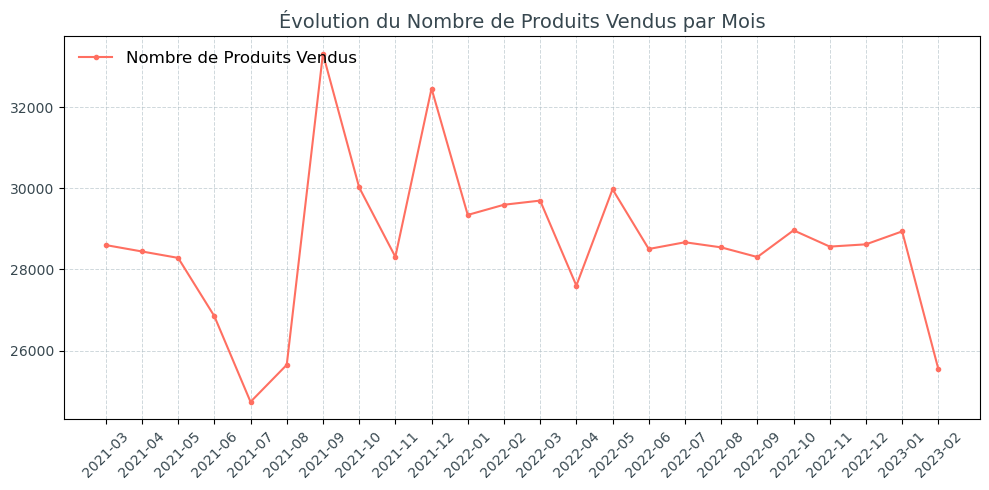

In [30]:
# Graphique de l'évolution du nombre de produits vendus par mois

plt.figure(figsize=(10, 5))

# Traçage des données avec un thème amélioré
plt.plot(
    df_nbre_produits_mensuel['month'].astype(str),
    df_nbre_produits_mensuel['nbre_produits'],
    marker='.',
    color='#FF6F61',  # Couleur rouge corail
    linestyle='-',
    label='Nombre de Produits Vendus',
    zorder=3
)

# Titres et labels
plt.title('Évolution du Nombre de Produits Vendus par Mois', fontsize=14, color='#37474F')  # Couleur du titre
plt.xticks(rotation=45, fontsize=10, color='#37474F')  # Taille de la police et rotation des mois
plt.yticks(fontsize=10, color='#37474F')

# Tracer la grille en arrière-plan
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='#B0BEC5', zorder=0)

# Ajout de la légende
plt.legend(loc='upper left', fontsize=12, frameon=False, facecolor='#ECEFF1')

# Ajustement de la mise en page
plt.tight_layout()

# Affichage
plt.show()

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.1.8 - Superposition des indicateurs</h4>
</div>

In [31]:
# Normalisation des échelles d'évolution pour comparaison
# Méthode de normalisation Min Max

data = {
    'month': df_transactions_mensuel['month'],
    'transactions': df_transactions_mensuel['nbre_transactions'],
    'clients': df_clients_mois['nbre_clients'],
    'produits': df_nbre_produits_mensuel['nbre_produits']
}

# Créer un DataFrame combiné
df_combined = pd.DataFrame(data)

# Normaliser les colonnes transactions, clients et produits
for column in ['transactions', 'clients', 'produits']:
    df_combined[f'{column}_normalized'] = (
        (df_combined[column] - df_combined[column].min()) / 
        (df_combined[column].max() - df_combined[column].min())
    )

In [32]:
#Graphique normalisé de superposition des indicateurs
 
# Convertir la colonne 'month' en string pour éviter l'erreur
df_combined['month'] = df_combined['month'].astype(str)

# Préparer les données
df_long = pd.melt(
    df_combined,
    id_vars=['month'],  # Identifier les colonnes fixes
    value_vars=['transactions_normalized', 'clients_normalized', 'produits_normalized'],
    var_name='Indicator',
    value_name='Normalized Value'
)

# Remplacer les noms des indicateurs pour plus de lisibilité
df_long['Indicator'] = df_long['Indicator'].str.replace('_normalized', '').str.capitalize()

# Créer un graphique interactif avec Plotly Express
fig = px.line(
    df_long,
    x='month',
    y='Normalized Value',
    color='Indicator',
    title='Comparaison des Indicateurs Normalisés par Mois',
    labels={'month': 'Mois', 'Normalized Value': 'Valeur Normalisée'},
)

# Ajuster les paramètres d'affichage
fig.update_layout(
    xaxis=dict(title='', tickangle=45),
    yaxis=dict(title='Valeur Normalisée'),
    title_font_size=18,
    legend_title_text='Indicateurs'
)

# Afficher le graphique interactif
fig.show()

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.2 - Zoom sur les références produits</h3>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.2.1 - Nombre de ventes et CA par produits</h4>
</div>

In [33]:
# Grouper par produits et compter le nombre de ventes de chaque prooduits
df_nbre_ventes_produits = df_transactions_detaillees.groupby('id_prod')['id_prod'].count().reset_index(name='nbre_ventes')

In [34]:
# Fusionner avec le catalogue produits pour obtenir les prix et inclure tous les produits, même ceux sans ventes
df_nbre_ventes_produits_prix = pd.merge(
    df_products,  # Le catalogue complet des produits
    df_nbre_ventes_produits,  # Les produits vendus
    on='id_prod',
    how='left'  # Conserver tous les produits, même sans ventes
)

# Remplacer les valeurs NaN dans la colonne 'nbre_ventes' par 0
df_nbre_ventes_produits_prix['nbre_ventes'] = df_nbre_ventes_produits_prix['nbre_ventes'].fillna(0)

# Trier par le nombre de ventes pour afficher d'abord les produits sans ventes
df_nbre_ventes_produits_prix = df_nbre_ventes_produits_prix.sort_values(by='nbre_ventes', ascending=True)

# Vérifier que les NaN ont été remplacés
df_nbre_ventes_produits_prix.head()

id_prod   price  categ  nbre_ventes
1945    2_72  141.32      2          0.0
736   0_1062   20.08      0          0.0
1030  0_1318   20.92      0          0.0
184   0_1016   35.06      0          0.0
1708    2_87  220.99      2          0.0

In [35]:
# Ajouter une colonne 'CA_produit' qui calcule le chiffre d'affaires par produit
df_nbre_ventes_produits_prix['CA_produit'] = df_nbre_ventes_produits_prix['nbre_ventes'] * df_nbre_ventes_produits_prix['price']

# Trier par le nombre de ventes pour afficher d'abord les produits sans ventes
df_nbre_ventes_produits_prix = df_nbre_ventes_produits_prix.sort_values(by='CA_produit', ascending=False)

# Afficher les premières lignes pour vérifier
df_nbre_ventes_produits_prix.head()

id_prod   price  categ  nbre_ventes  CA_produit
1314   2_159  145.99      2        650.0    94893.50
2670   2_135   68.99      2       1005.0    69334.95
465    2_112   67.57      2        968.0    65407.76
2345   2_102   59.14      2       1027.0    60736.78
492    2_209   69.99      2        814.0    56971.86

In [36]:
#Calcul du chiffre d'affaire total
CA_total = df_nbre_ventes_produits_prix['CA_produit'].sum()

# Arrondir le chiffre d'affaires total à l'entier le plus proche
CA_total_rounded = round(CA_total)

# Formater le chiffre d'affaires total arrondi pour un affichage lisible
CA_total_formatted = f"{CA_total_rounded:,}".replace(",", " ") + " €"

# Afficher le chiffre d'affaires total formaté
print(f"Le chiffre d'affaires total est : {CA_total_formatted}")

Le chiffre d'affaires total est : 12 027 663 €


<div style="background:#FFEEDA;padding:10px;">
  Le chiffre d'affaires total sur cette période est de : <strong>12 027 663 €</strong>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.2.2 - Les Tops références produits</h4>
</div>

In [37]:
# Créer une boite à moustache pour visualiser les ventes par produits
fig = px.box(
    df_nbre_ventes_produits_prix,
    x='nbre_ventes',
    title='Ventes par Produit',
    labels={'nbre_ventes': 'Nombre de Ventes'},
    template='plotly'
)

# Afficher le graphique
fig.show()

<div style="background:#FFEEDA;padding:10px;">
Afin de préciser les produits qui performent le plus, nous allons analyser la dispersion du nombre de vente par produits et définir des outliers, qui représenterons ici les produits qui excellent en comparaison aux autres.
</div>

In [38]:
# Définir les outliers afin de voir si certains produits performent plus
# Calcul avec la méthode interquartile
Q1 = df_nbre_ventes_produits_prix['nbre_ventes'].quantile(0.25) # Premier quartile
Q3 = df_nbre_ventes_produits_prix['nbre_ventes'].quantile(0.75) # Troisième quartile

# écart interquartile
IQR = Q3 - Q1

# Définir le seuil supérieur pour les valeurs aberrantes
seuil_superieur = Q3 + 1.5 * IQR
print(f"Seuil supérieur : {seuil_superieur}")

Seuil supérieur : 576.0


In [39]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

# Filtrer les articles considéré comme des outliers
outliers = df_nbre_ventes_produits_prix[df_nbre_ventes_produits_prix['nbre_ventes'] > seuil_superieur]

# Calculer le nombre de produits outliers
nombre_outliers = outliers.shape[0]
# Calculer le nombre total de produits
nombre_total = df_nbre_ventes_produits_prix.shape[0]
# Calculer la proportion des outliers
proportion_outliers = (nombre_outliers / nombre_total) * 100

# Afficher les résultats
print(f"Nombre d'articles outliers : {nombre_outliers}")
print(f"Proportion d'articles outliers : {proportion_outliers:.2f}%")

Nombre d'articles outliers : 395
Proportion d'articles outliers : 12.02%


In [40]:
# Palmares des articles en nombre de ventes (TOP 20)
df_nbre_ventes_produits_prix = df_nbre_ventes_produits_prix.sort_values(by='nbre_ventes', ascending=False)

# Afficher les 10 produits les plus vendus
df_nbre_ventes_produits_prix.head(20)

id_prod  price  categ  nbre_ventes  CA_produit
2646   1_369  23.99      1       2340.0    56136.60
2199   1_417  20.99      1       2269.0    47626.31
2217   1_414  23.83      1       2246.0    53522.18
2886   1_498  23.37      1       2202.0    51460.74
1040   1_425  16.99      1       2163.0    36749.37
740    1_403  17.99      1       2040.0    36699.60
3240   1_413  17.99      1       2036.0    36627.64
2587   1_412  16.65      1       2014.0    33533.10
1549   1_406  24.81      1       2003.0    49694.43
1325   1_407  15.99      1       2001.0    31995.99
641    1_396  18.60      1       1999.0    37181.40
1354   1_398  10.17      1       1975.0    20085.75
1746   1_395  28.99      1       1953.0    56617.47
884    1_400  16.60      1       1906.0    31639.60
3035   1_392  18.11      1       1899.0    34390.89
2430   1_376  17.49      1       1870.0    32706.30
205    1_385  25.99      1       1870.0    48601.30
369    1_397  18.99      1       1858.0    35283.42
3127   1_388  16.70      1       1858.0    31028.60
3235   1_383  28.99      1       1857.0    53834.43

<div style="background:#FFEEDA;padding:10px;">
  Ces analyses nous permettent de voir que : 
    <ul>
        <li><strong>395 produits</strong> montrent un nombre de ventes plus significatif que le reste du catalogue (seuil de vente supérieur à 566). Cela représente <strong>12%</strong> du catalogue</li>
        <li>Le top des 20 produits avec le <strong>plus de ventes sont de catégorie 1</strong>.</li>
    </ul>
</div>

In [41]:
# Sélectionner les 20 premiers produits en fonction du nombre de ventes
top_20_ventes = df_nbre_ventes_produits_prix.sort_values(by='nbre_ventes', ascending=False).head(20)

# Réinitialiser l'index pour éviter les problèmes avec category_orders
top_20_ventes = top_20_ventes.reset_index(drop=True)

# Graphique en barres horizontales 
fig = px.bar(
    top_20_ventes, 
    x='nbre_ventes', 
    y='id_prod',
    title="Top 20 des Articles par Nombre de Ventes", 
    template='ggplot2',
    color='nbre_ventes', 
    orientation='h',
    labels={'nbre_ventes': 'Nombre de Ventes'},
    category_orders={'id_prod': top_20_ventes['id_prod'][::-1]}
)

fig.update_layout(
    yaxis_title=None,  # Masquer le titre de l'axe Y
    width=1000,  # Largeur
    height=600,  # Hauteur
    yaxis=dict(tickmode='linear', tickfont=dict(size=9), automargin=True)
)

fig.show()

In [42]:
# Calculer le 20 / 80 en Nombre de ventes  

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
total_quantity = df_nbre_ventes_produits_prix['nbre_ventes'].sum()
df_nbre_ventes_produits_prix['part_quantity'] = df_nbre_ventes_produits_prix['nbre_ventes'] / total_quantity

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_nbre_ventes_produits_prix['part_quantity_cumulee'] = df_nbre_ventes_produits_prix['part_quantity'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
articles_80_quantity = df_nbre_ventes_produits_prix[df_nbre_ventes_produits_prix['part_quantity_cumulee'] <= 0.80]  # Articles dont la somme cumulative est ≤ 80%
nombre_articles_80_quantity = articles_80_quantity.shape[0]  # Nombre d'articles

print(f"Nombre d'articles représentant 80% des ventes en quantité : {nombre_articles_80_quantity}")

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
nombre_total_articles = df_nbre_ventes_produits_prix.shape[0]  # Nombre total d'articles
proportion_articles_80_quantity = (nombre_articles_80_quantity / nombre_total_articles) * 100  # Proportion en pourcentage

print(f"Proportion des articles représentant 80% des ventes en quantité dans le catalogue : {proportion_articles_80_quantity:.2f}%")

Nombre d'articles représentant 80% des ventes en quantité : 809
Proportion des articles représentant 80% des ventes en quantité dans le catalogue : 24.62%


<div style="background:#FFEEDA;padding:10px;">
  <strong>Proportions 20/80 en nombre de ventes</strong>
    <ul>
        <li><strong>809 produits</strong> représente 80% du Chiffre d'affaire</li>
        <li>Soit une proportion de <strong>24,62%</strong> du catalogue</li>
    </ul>
</div>

In [43]:
# Palmares des articles en CA

#Effectuer le tri dans l'ordre décroissant du CA 
df_nbre_ventes_produits_prix = df_nbre_ventes_produits_prix.sort_values(by='CA_produit', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_nbre_ventes_produits_prix = df_nbre_ventes_produits_prix.reset_index(drop=True)

#Afficher les 20 premier articles en CA
df_nbre_ventes_produits_prix[['id_prod','price','nbre_ventes','CA_produit','categ']].head(20)

id_prod   price  nbre_ventes  CA_produit  categ
0    2_159  145.99        650.0    94893.50      2
1    2_135   68.99       1005.0    69334.95      2
2    2_112   67.57        968.0    65407.76      2
3    2_102   59.14       1027.0    60736.78      2
4    2_209   69.99        814.0    56971.86      2
5    1_395   28.99       1953.0    56617.47      1
6    1_369   23.99       2340.0    56136.60      1
7    2_110   62.25        865.0    53846.25      2
8    1_383   28.99       1857.0    53834.43      1
9    1_414   23.83       2246.0    53522.18      1
10    2_39   57.99        915.0    53060.85      2
11   2_166  230.04        228.0    52449.12      2
12   1_498   23.37       2202.0    51460.74      1
13    2_43   69.99        714.0    49972.86      2
14   1_406   24.81       2003.0    49694.43      1
15   1_366   28.54       1711.0    48831.94      1
16   1_385   25.99       1870.0    48601.30      1
17   1_431   27.99       1729.0    48394.71      1
18   1_379   26.99       1775.0    47907.25      1
19   1_378   26.61       1794.0    47738.34      1

In [44]:
#Graphique en barre des 20 premiers produits

top_20_ca = df_nbre_ventes_produits_prix.head(20)

fig = px.bar(top_20_ca, 
             x='CA_produit', 
             y='id_prod', 
             title="Top 20 des articles par Chiffre d'Affaires (CA)", 
             template='ggplot2',
             color='CA_produit', 
             orientation='h',
             category_orders={'id_prod': top_20_ca['id_prod'][::-1]})

fig.update_layout(
    yaxis_title=None,  # Masquer le titre de l'axe Y
    width=1000,  # Largeur
    height=600,  # Hauteur
    yaxis=dict(tickmode='linear', tickfont=dict(size=9), automargin=True)
)

fig.show()

In [45]:
# Calculer le 20 / 80 en CA

#Créer une colonne calculant la part du CA de la ligne dans le dataset
total_CA = df_nbre_ventes_produits_prix['CA_produit'].sum()
df_nbre_ventes_produits_prix['part_CA'] = df_nbre_ventes_produits_prix['CA_produit'] / total_CA
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_nbre_ventes_produits_prix['part_CA_cumulee'] = df_nbre_ventes_produits_prix['part_CA'].cumsum()
# Convertir les colonnes part_CA et part_CA_cumulee en pourcentage avec arrondi à 2 décimales
df_nbre_ventes_produits_prix['part_CA'] = (df_nbre_ventes_produits_prix['part_CA'] * 100).round(2)  
df_nbre_ventes_produits_prix['part_CA_cumulee'] = (df_nbre_ventes_produits_prix['part_CA_cumulee'] * 100).round(2) 

#Grâce au deux colonnes créées précédemment, calculer le nombre d'articles représentant 80% du CA
# Articles dont la somme cumulative du CA est inférieure ou égale à 80%
articles_80_CA = df_nbre_ventes_produits_prix[df_nbre_ventes_produits_prix['part_CA_cumulee'] <= 80]

# Nombre d'articles représentant 80% du CA
nombre_articles_80_CA = articles_80_CA.shape[0]
print(f"Nombre d'articles représentant 80% du CA : {nombre_articles_80_CA}")

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
# Nombre total d'articles
nombre_total_articles = df_nbre_ventes_produits_prix.shape[0]
# Proportion des articles représentant 80% du CA
proportion_articles_80_CA = nombre_articles_80_CA / nombre_total_articles * 100 
print(f"Proportion des articles représentant 80% du CA dans le catalogue : {proportion_articles_80_CA:.2f}%")

Nombre d'articles représentant 80% du CA : 699
Proportion des articles représentant 80% du CA dans le catalogue : 21.27%


<div style="background:#FFEEDA;padding:10px;">
  <strong>Proportions 20/80 en chiffre d'affaire</strong>
    <ul>
        <li><strong>699 produits</strong> représente 80% du Chiffre d'affaire</li>
        <li>Soit une proportion de <strong>21,27%</strong> du catalogue</li>
        <li>Le top 20 des produits est composé de produits de catégorie 2 et 1, avec un top 5 uniquement de catégorie 2.</li>
    </ul>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.2.3 - Les Flops références produits</h4>
</div>

In [46]:
# Filtrer les produits avec un chiffre d'affaires égal à 0
produits_zero_vente = df_nbre_ventes_produits_prix[df_nbre_ventes_produits_prix['CA_produit'] == 0]

# Calculer le nombre de produits avec un chiffre d'affaires égal à 0
nb_produits_zero_vente = produits_zero_vente.shape[0]

# Afficher le résultat
print(f"Nombre de produits avec un CA_produit = 0 : {nb_produits_zero_vente}")

Nombre de produits avec un CA_produit = 0 : 21


In [47]:
# Affihcer les produits sans ventes
produits_zero_vente[['id_prod', 'categ']].head(21)

id_prod  categ
3265  0_1025      0
3266   0_322      0
3267  0_1318      0
3268  0_1016      0
3269    2_87      2
3270  0_1800      0
3271   0_510      0
3272   0_310      0
3273  0_1620      0
3274  0_2308      0
3275    2_86      2
3276  0_1119      0
3277  0_1645      0
3278     1_0      1
3279  0_1624      0
3280   1_394      1
3281  0_1062      0
3282   0_299      0
3283  0_1780      0
3284  0_1014      0
3285    2_72      2

<div style="background:#FFEEDA;padding:10px;">
 21 produits n'ont réalisé aucun chiffre d'affaire.
    <br>On remarque qu'il s'agit principalement de produits de catégorie 0.
</div>

In [48]:
#On détermine les produits aux performances moindres en terme de nombre de ventes

# Créer un nouveau DataFrame sans les produits avec un CA_produit de 0
df_nbre_ventes_produits_non_nulle = df_nbre_ventes_produits_prix[df_nbre_ventes_produits_prix['CA_produit'] > 0]

#On sélectionne les produits en dessous du 1er quartile (25%)
Q1_nb = df_nbre_ventes_produits_non_nulle['nbre_ventes'].quantile(0.25) # Premier quartile
flops_Q1_nb = df_nbre_ventes_produits_non_nulle[df_nbre_ventes_produits_non_nulle['nbre_ventes'] < Q1_nb]
print(f"Produits dans le 1er quartile (Q1) : {len(flops_Q1_nb)}")

# Afficher les premières lignes (tête) du DataFrame avec les colonnes spécifiques
print("Tête du DataFrame :")
print(flops_Q1_nb[['id_prod', 'nbre_ventes', 'CA_produit']].head())

# Afficher les dernières lignes (queue) du DataFrame avec les colonnes spécifiques
print("\nQueue du DataFrame :")
print(flops_Q1_nb[['id_prod', 'nbre_ventes', 'CA_produit']].tail())

Produits dans le 1er quartile (Q1) : 805
Tête du DataFrame :
     id_prod  nbre_ventes  CA_produit
662      2_2         15.0     4500.00
959      2_5         14.0     2687.86
977     2_11         13.0     2625.87
1033    2_84         13.0     2369.90
1052    2_76          9.0     2289.96

Queue du DataFrame :
     id_prod  nbre_ventes  CA_produit
3260   0_541          1.0        1.99
3261  0_1601          1.0        1.99
3262  0_1653          2.0        1.98
3263  0_1284          1.0        1.38
3264  0_1539          1.0        0.99


In [49]:
#On s'intéresse aux performances en terme de CA par produit

#On sélectionne les produits en dessous du 1er quartile (25%)
Q1_CA = df_nbre_ventes_produits_non_nulle['CA_produit'].quantile(0.25) # Premier quartile
flops_Q1_CA = df_nbre_ventes_produits_non_nulle[df_nbre_ventes_produits_non_nulle['CA_produit'] < Q1_CA]
print(f"Produits dans le 1er quartile (Q1) : {len(flops_Q1_CA)}")

#Ordonner par CA
flops_Q1_CA = flops_Q1_CA.sort_values(by='CA_produit', ascending=True)

# Afficher les premières lignes (tête) du DataFrame avec les colonnes spécifiques
print("Tête du DataFrame :")
print(flops_Q1_CA[['id_prod', 'nbre_ventes', 'CA_produit']].head())

# Afficher les dernières lignes (queue) du DataFrame avec les colonnes spécifiques
print("\nQueue du DataFrame :")
print(flops_Q1_CA[['id_prod', 'nbre_ventes', 'CA_produit']].tail())

Produits dans le 1er quartile (Q1) : 816
Tête du DataFrame :
     id_prod  nbre_ventes  CA_produit
3264  0_1539          1.0        0.99
3263  0_1284          1.0        1.38
3262  0_1653          2.0        1.98
3259   0_807          1.0        1.99
3261  0_1601          1.0        1.99

Queue du DataFrame :
     id_prod  nbre_ventes  CA_produit
2453  0_2297          8.0      231.92
2452  0_2017          8.0      231.92
2451  0_1986          9.0      233.01
2450    0_39         26.0      233.74
2449   0_101         18.0      233.82


<div style="background:#FFEEDA;padding:10px;">
    <ul>
        <li>21 produits n'ont généré aucun chiffre d'affaires (CA_produit = 0).</li>
        <li>805 produits ont enregistré moins de 16 ventes, ce qui correspond au 1er quartile du nombre de ventes (25 % des produits ayant les plus faibles performances en termes de volume).</li>
        <li>816 produits ont réalisé un chiffre d'affaires inférieur à 234 €, ce qui correspond au 1er quartile des produits en termes de revenus générés.</li>
    </ul>
</div>


<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.2.4 - La répartition par catégorie de produits</h4>
</div>

In [50]:
# Calcul du nombre de ventes, du chiffre d'affaires et du nombre de produits par catégorie
df_categ_summary = df_nbre_ventes_produits_prix.groupby('categ').agg(
    nbre_ventes=('nbre_ventes', 'sum'),
    CA_categ=('CA_produit', 'sum'),
    nbre_produits=('id_prod', 'nunique')  # Nombre de produits uniques par catégorie
).reset_index()

# Convertir les colonnes en format lisible
df_categ_summary['CA_categ'] = df_categ_summary['CA_categ'].apply(lambda x: round(x, 2))
df_categ_summary['nbre_ventes'] = df_categ_summary['nbre_ventes'].astype(int)

# Reformater la colonne CA_categ pour un affichage lisible
df_categ_summary['CA_categ'] = df_categ_summary['CA_categ'].apply(
    lambda x: f"{int(x):,}".replace(",", " ") + " €"
)

# Renommer les colonnes pour un affichage clair
df_categ_summary = df_categ_summary.rename(columns={
    'categ': 'Catégorie',
    'nbre_produits': 'Nombre de Produits',
    'nbre_ventes': 'Nombre de Ventes',
    'CA_categ': 'Chiffre d\'Affaires'
})

# Réorganiser les colonnes pour afficher "Nombre de Produits" en deuxième position
df_categ_summary = df_categ_summary[['Catégorie', 'Nombre de Produits', 'Nombre de Ventes', 'Chiffre d\'Affaires']]

# Créer le tableau formaté avec tabulate
table = tabulate(df_categ_summary, headers='keys', tablefmt='fancy_grid', showindex=False)

# Afficher le tableau
print(table)

╒═════════════╤══════════════════════╤════════════════════╤══════════════════════╕
│   Catégorie │   Nombre de Produits │   Nombre de Ventes │ Chiffre d'Affaires   │
╞═════════════╪══════════════════════╪════════════════════╪══════════════════════╡
│           0 │                 2308 │             415459 │ 4 419 730 €          │
├─────────────┼──────────────────────┼────────────────────┼──────────────────────┤
│           1 │                  739 │             235592 │ 4 827 657 €          │
├─────────────┼──────────────────────┼────────────────────┼──────────────────────┤
│           2 │                  239 │              36483 │ 2 780 275 €          │
╘═════════════╧══════════════════════╧════════════════════╧══════════════════════╛


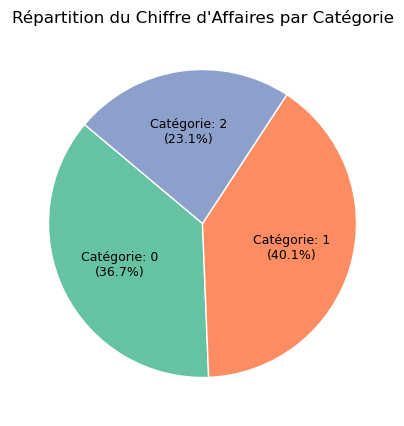

In [51]:
#Graphique de la répartition par catégories en CA

# Préparation des données
labels = df_categ_summary['Catégorie']
values = df_categ_summary['Chiffre d\'Affaires'].apply(lambda x: int(x.replace(" €", "").replace(" ", "")))

# Utilisation d'une palette Seaborn
colors = sns.color_palette('Set2', len(labels))

# Création du graphique en camembert
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,  # Masquer les labels directs pour les personnaliser
    autopct='%1.1f%%',  # Ajouter les pourcentages
    colors=colors,
    startangle=140,  # Orientation du camembert
    wedgeprops={'edgecolor': 'white'}  # Bordures blanches
)

# Personnalisation des labels
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    autotext.set_text(f"Catégorie: {labels[i]}\n({autotext.get_text()})")
    autotext.set_fontsize(9)  # Taille plus petite pour les pourcentages
    autotext.set_color('black')  # Couleur du texte

# Ajouter un titre
plt.title("Répartition du Chiffre d'Affaires par Catégorie", fontsize=12)

# Afficher le graphique
plt.show()

In [52]:
#Déterminer le top5 produit par catégorie en CA
top_5_par_categorie = (
    df_nbre_ventes_produits_prix
    .sort_values(by='CA_produit', ascending=False)  # Trier par chiffre d'affaires décroissant
    .groupby('categ')  # Grouper par catégorie
    .head(5)  # Sélectionner les 5 premiers produits par groupe
)

# Afficher les résultats (colonnes pertinentes)
top_5_par_categorie = top_5_par_categorie[['categ', 'id_prod', 'nbre_ventes', 'CA_produit']]
print(top_5_par_categorie)

     categ id_prod  nbre_ventes  CA_produit
0        2   2_159        650.0    94893.50
1        2   2_135       1005.0    69334.95
2        2   2_112        968.0    65407.76
3        2   2_102       1027.0    60736.78
4        2   2_209        814.0    56971.86
5        1   1_395       1953.0    56617.47
6        1   1_369       2340.0    56136.60
8        1   1_383       1857.0    53834.43
9        1   1_414       2246.0    53522.18
12       1   1_498       2202.0    51460.74
94       0  0_1441       1235.0    23452.65
100      0  0_1421       1151.0    23008.49
111      0  0_1414       1150.0    22287.00
115      0  0_1451       1085.0    21689.15
117      0  0_1417       1188.0    21372.12


In [53]:
# Définir le maximum du seuil
SEUIL_MAX = 234 #Correspond au 1er quantile des articles avec le moins de performance

# Fonction pour tracer le graphique
def plot_repartition_categorie(seuil):
    # Filtrer les produits en dessous du seuil
    produits_sous_seuil = df_nbre_ventes_produits_prix[df_nbre_ventes_produits_prix['CA_produit'] <= seuil]

    # Préparer les données pour la répartition par catégorie
    repartition_categorie = produits_sous_seuil.groupby('categ')['id_prod'].count().reset_index()
    repartition_categorie.columns = ['Catégorie', 'Nombre de Produits']

    # Créer le graphique interactif
    fig = px.pie(
        repartition_categorie,
        values='Nombre de Produits',
        names='Catégorie',
        title=f"Répartition par Catégorie des Produits Performant Le Moins en CA (Seuil : {seuil}€)",
        color_discrete_sequence=px.colors.qualitative.Set3  # Thème de couleurs plus esthétique
    )

    # Ajouter les labels à l'intérieur des sections
    fig.update_traces(textinfo='label+percent', textfont_size=14)

    fig.show()

# Interface interactive avec le seuil dynamique
interact(plot_repartition_categorie, seuil=widgets.IntSlider(value=0, min=0, max=SEUIL_MAX, step=10));

interactive(children=(IntSlider(value=0, description='seuil', max=234, step=10), Output()), _dom_classes=('wid…

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.3 - Analyse des profils des clients</h3>
</div>

In [54]:
# Fusion des dataframes df_transactions_detaillees et df_customers
df_clients_transactions = pd.merge(
    df_transactions_detaillees,
    df_customers,
    on='client_id',
    how='left'  # Inclure toutes les lignes des transactions
)

In [55]:
# Vérifier s'il existe des transactions sans correspondance client
transactions_sans_client = df_clients_transactions[df_clients_transactions['client_id'].isnull()]

# Nombre de transactions sans correspondance
nombre_transactions_sans_client = transactions_sans_client.shape[0]

# Afficher le résultat
if nombre_transactions_sans_client > 0:
    print(f"Nombre de transactions sans correspondance client : {nombre_transactions_sans_client}")
else:
    print("Toutes les transactions ont trouvées une correspondance avec un client.")

Toutes les transactions ont trouvées une correspondance avec un client.


In [56]:
df_clients_transactions.head()

id_prod                       date session_id client_id  price  categ  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329  11.99      0   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664  19.37      0   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   4.50      0   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   6.55      0   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  16.49      0   

     month sex  birth  
0  2021-03   f   1967  
1  2021-03   m   1960  
2  2021-03   m   1988  
3  2021-03   f   1989  
4  2021-03   f   1956

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.3.1 - Répartition du chiffre d’affaire pour les clients BtoB</h4>
</div>

<div style="background:#FFEEDA;padding:10px;">La base client n'indique pas le type de client.
    <br/>Afin d'identifier les potentiels clients pro nous allons analyser le volume des ventes par clients.</ul>
</div>


In [57]:
# Calculer le chiffre d'affaires total et le nombre de produits vendus par client
df_ventes_clients = df_clients_transactions.groupby('client_id').agg(
    CA_client=('price', 'sum'),  # Somme du chiffre d'affaires
    nbre_produits=('id_prod', 'count')  # Nombre de produits vendus
).reset_index()

# Trier les résultats par chiffre d'affaires décroissant
df_ventes_clients = df_ventes_clients.sort_values(by='nbre_produits', ascending=False)

# Afficher les premières lignes
print(df_ventes_clients.head())

     client_id  CA_client  nbre_produits
677     c_1609  326039.89          25586
6337    c_6714  153918.60           9199
2724    c_3454  114110.57           6793
4388    c_4958  290227.03           5222
1268    c_2140    5260.18            405


In [58]:
# Créer une boîte à moustaches pour la répartition du nombre de produits par client
fig = px.box(
    df_ventes_clients,
    x='nbre_produits',
    title="Répartition du Nombre Total de Produits par Client",
    labels={'nbre_produits': "Nombre Total de Produits"},
    template='plotly_white'
)

# Personnaliser l'apparence
fig.update_traces(marker_color='lightblue', line_color='blue')
fig.update_layout(
    xaxis=dict(title='Nombre Total de Produits'),
    yaxis=dict(showticklabels=False),  # Masquer les ticks inutiles sur l'axe Y
    title_font_size=16
)

# Afficher le graphique
fig.show()

<div style="background:#FFEEDA;padding:10px;">La répartition des volumes de vente nous permet d'observer que 4 clients sont énormément éloignés des volumes de ventes classique. Nous identifirons donc ces clients comme des clients B2B.</ul>
</div>

In [59]:
# Déterminer le z-score pour identifier les outliers

#Calculer la moyenne des ventes
moyenne=df_ventes_clients['nbre_produits'].mean()
print("Moyenne des ventes par clients : ", round(moyenne,2))

#Calculer l'écart-type des ventes
ecarttype=df_ventes_clients['nbre_produits'].std()
print("Ecart type des ventes : ", round(ecarttype,2))
print("\n")
#Calculer le Z-score
zscore = round((df_ventes_clients['nbre_produits'] - moyenne) / ecarttype,2)

#Stockage du Z-score dans une nouvelle colonne
df_ventes_clients['z_score_vente'] = zscore

Moyenne des ventes par clients :  79.95
Ecart type des ventes :  313.53




In [60]:
# Filtrer les clients avec un Z-score supérieur à 3
clients_outliers = df_ventes_clients[df_ventes_clients['z_score_vente'] > 3]

# Afficher les clients avec un Z-score supérieur à 3
print("Clients avec un Z-score supérieur à 3 :")
print(clients_outliers)

Clients avec un Z-score supérieur à 3 :
     client_id  CA_client  nbre_produits  z_score_vente
677     c_1609  326039.89          25586          81.35
6337    c_6714  153918.60           9199          29.08
2724    c_3454  114110.57           6793          21.41
4388    c_4958  290227.03           5222          16.40


In [61]:
#Supprimer les clients B2B de la table des ventes clients
df_ventes_clients = df_ventes_clients[~df_ventes_clients['client_id'].isin(clients_outliers['client_id'])]

In [62]:
# On crée un dataframe avec uniquement les transactions b2b
client_ids_outliers = clients_outliers['client_id']
transactions_b2b = df_clients_transactions[df_clients_transactions['client_id'].isin(client_ids_outliers)]
df_transactions_b2b = transactions_b2b.copy()

# Afficher les transactions extraites
print(f"Nombre de transactions des clients B2B : {df_transactions_b2b.shape[0]}")
df_transactions_b2b.head()

Nombre de transactions des clients B2B : 46800


id_prod                       date session_id client_id  price  categ  \
6   0_1304 2021-03-01 00:07:04.371179        s_7    c_1609   5.86      0   
13  0_1159 2021-03-01 00:11:57.832228        s_7    c_1609   7.99      0   
50  0_1431 2021-03-01 01:08:49.803921       s_33    c_3454  10.99      0   
78  0_1425 2021-03-01 01:56:41.944044       s_46    c_1609  12.99      0   
88  0_1469 2021-03-01 02:12:21.294004       s_53    c_1609  14.99      0   

      month sex  birth  
6   2021-03   m   1980  
13  2021-03   m   1980  
50  2021-03   m   1969  
78  2021-03   m   1980  
88  2021-03   m   1980

In [63]:
#Supprimer les clients B2B de la base des transactions

# Nombre de lignes avant suppression
lignes_avant = df_clients_transactions.shape[0]

# Supprimer les transactions associées aux clients outliers
df_clients_transactions = df_clients_transactions[~df_clients_transactions['client_id'].isin(clients_outliers['client_id'])]

# Nombre de lignes après suppression
lignes_apres = df_clients_transactions.shape[0]

# Calculer le nombre de lignes supprimées
lignes_supprimees = lignes_avant - lignes_apres

# Afficher le résultat
print(f"Nombre de lignes supprimées : {lignes_supprimees}")
print(f"Nombre de lignes restantes : {lignes_apres}")

Nombre de lignes supprimées : 46800
Nombre de lignes restantes : 640734


<div style="background:#FFEEDA;padding:10px;">En observant la répartition des volumes de ventes on observe que <strong>certains clients ont des volumes de ventes largement supérieur à la moyenne</strong>. Nous considèrerons ces clients comme étant des <strong>clients B2B</strong>.
    <br/>Afin de déterminer le seuil de ces outliers, nous utilisons la <strong>méthode du z-score</strong>. Les clients avec un z-score de volume de vente strictement supérieur à 3 seront considéré comme B2B.
    <br><strong>4 clients ont été identifés comme B2B</strong>. Nous les supprimons de nos données afin que leurs volumes de ventes ne veillent pas fausser les analyses futures.
</div


In [64]:
# Calculer le CA total des transactions B2B
ca_total_b2b = int(df_transactions_b2b['price'].sum())
print(f"Chiffre d'affaires total des clients B2B : {ca_total_b2b} €")

Chiffre d'affaires total des clients B2B : 884296 €


In [65]:
# Calculer le pourcentage du CA B2B par rapport au CA total
pourcentage_ca_b2b = (ca_total_b2b / CA_total) * 100

# Arrondir le pourcentage à 2 décimales (facultatif)
pourcentage_ca_b2b = round(pourcentage_ca_b2b, 2)

# Afficher le résultat
print(f"Le CA des clients B2B représente {pourcentage_ca_b2b}% du chiffre d'affaires total.")

Le CA des clients B2B représente 7.35% du chiffre d'affaires total.


<div style="background:#FFEEDA;padding:10px;">Le <strong>chiffre d'affaire des clients B2B</strong> est de <strong>884 296 €</strong>, soit <strong>7,35% du chiffre d'affaire total</strong>.
</div>

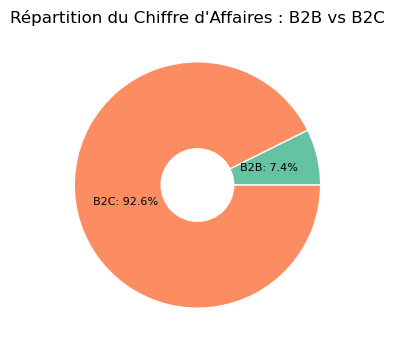

In [66]:
# Représentation de la répartition du CA B2B, B2C

labels = ['B2B', 'B2C']
values = [ca_total_b2b, CA_total - ca_total_b2b]

# Utilisation d'une palette Seaborn
colors = sns.color_palette('Set2', len(labels))

# Création du graphique en anneau
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,  # Masquer les labels directs pour personnalisation
    autopct='%1.1f%%',  # Ajouter les pourcentages
    colors=colors,
    wedgeprops={'edgecolor': 'white'}  # Bordures blanches
)

centre_circle = plt.Circle((0, 0), 0.30, fc='white') 
plt.gca().add_artist(centre_circle)

# Personnalisation des labels
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    autotext.set_text(f"{labels[i]}: {autotext.get_text()}")  # Texte avec label et pourcentage
    autotext.set_fontsize(8)
    autotext.set_color('black')

# Ajouter un titre
plt.title("Répartition du Chiffre d'Affaires : B2B vs B2C", fontsize=12)

# Afficher le graphique
plt.show()

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.3.2 - Courbe de Lorenz</h4>
</div>

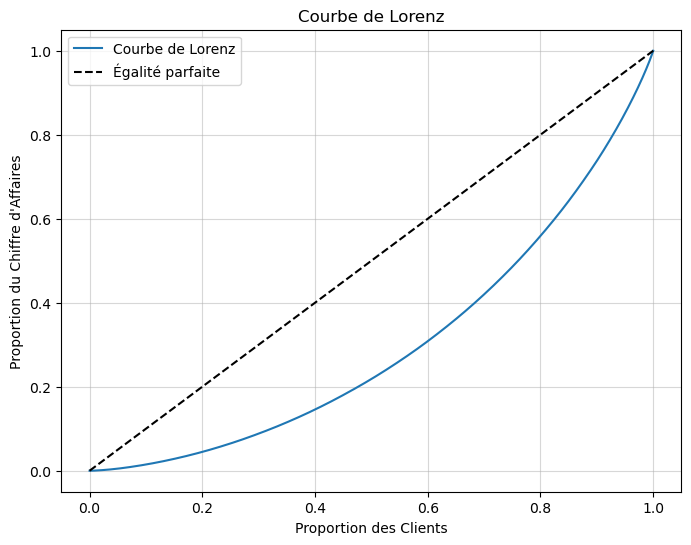

In [67]:
# Calculer la courbe de Lorenz
def courbe_lorenz(data):
    sorted_data = np.sort(data)  # Trier les données
    cumsum = np.cumsum(sorted_data)  # Somme cumulée
    total = cumsum[-1]
    lorenz = np.insert(cumsum / total, 0, 0)  # Ajouter 0 au début
    return lorenz

# Avec le chiffre d'affaires par client
CA_data = df_ventes_clients['CA_client'].values  # Extraire les chiffres d'affaires
lorenz_curve = courbe_lorenz(CA_data)
x = np.linspace(0.0, 1.0, len(lorenz_curve))

# Tracer la courbe
plt.figure(figsize=(8, 6))
plt.plot(x, lorenz_curve, label="Courbe de Lorenz")
plt.plot([0, 1], [0, 1], linestyle="--", color="black", label="Égalité parfaite")
plt.title("Courbe de Lorenz")
plt.xlabel("Proportion des Clients")
plt.ylabel("Proportion du Chiffre d'Affaires")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

<div style="background:#FFEEDA;padding:10px;">La courbe de Lorenz montre une répartition inégale du chiffre d'affaires entre les clients : une petite proportion de clients génère une grande part du chiffre d'affaires, tandis que la majorité des clients contribue très peu. Plus la courbe s'éloigne de la diagonale, plus l'inégalité est forte.

<div style="background-color:#638BC9;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 3 - Analyse ciblées et corrélations</h2>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">3.1 - Lien entre le genre d’un client et les catégories des livres achetés </h3>
</div>

In [68]:
# Filtrer les clients acheteurs uniques avec leur sexe
clients_uniques = df_clients_transactions[['client_id', 'sex']].drop_duplicates()

# Compter le nombre de femmes (f) et d'hommes (m) parmi les clients uniques
repartition_sex = clients_uniques['sex'].value_counts().reset_index()
repartition_sex.columns = ['Sexe', 'Nombre']

# Calculer le pourcentage pour chaque sexe
repartition_sex['Pourcentage'] = (repartition_sex['Nombre'] / repartition_sex['Nombre'].sum()) * 100
# Formater le pourcentage pour qu'il soit arrondi à 2 décimales et lisible
repartition_sex['Pourcentage'] = repartition_sex['Pourcentage'].apply(lambda x: f"{x:.2f}%")

# Afficher la table avec tabulate
print("=== Nombre de clients par genre et répartition en pourcentage ===")
table_repartition_sex = tabulate(repartition_sex, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table_repartition_sex)

=== Nombre de clients par genre et répartition en pourcentage ===
╒════════╤══════════╤═══════════════╕
│ Sexe   │   Nombre │ Pourcentage   │
╞════════╪══════════╪═══════════════╡
│ f      │     4478 │ 52.09%        │
├────────┼──────────┼───────────────┤
│ m      │     4118 │ 47.91%        │
╘════════╧══════════╧═══════════════╛


In [69]:
# Table de contingence : nombre de livres achetés par genre et par catégorie
table_sex_categ = df_clients_transactions.groupby(['sex', 'categ']).size().unstack(fill_value=0)

# Convertir en DataFrame pour tabulate
table_sex_categ_tabulate = table_sex_categ.reset_index()

# Ajouter un titre et afficher avec tabulate
print("=== Nombre de livres achetés par genre et par catégorie ===")
print(tabulate(table_sex_categ_tabulate, headers='keys', tablefmt='fancy_grid', showindex=False))

=== Nombre de livres achetés par genre et par catégorie ===
╒═══════╤════════╤════════╤═══════╕
│ sex   │      0 │      1 │     2 │
╞═══════╪════════╪════════╪═══════╡
│ f     │ 200793 │ 115721 │ 16980 │
├───────┼────────┼────────┼───────┤
│ m     │ 186488 │ 104884 │ 15868 │
╘═══════╧════════╧════════╧═══════╛


<Figure size 1000x600 with 0 Axes>

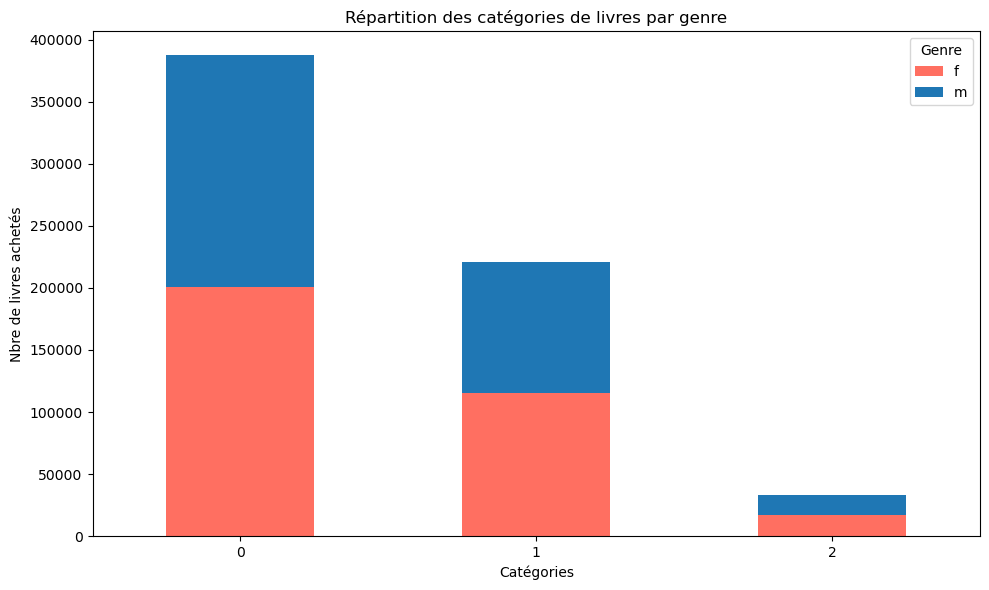

In [70]:
# Créer une visualisation en barres empilées à partir de la table de contingence
plt.figure(figsize=(10, 6))

# Tracer les barres empilées
table_sex_categ.T.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=["#FF6F61", "#1f77b4"]
)

# Ajouter les titres et labels
plt.title("Répartition des catégories de livres par genre")
plt.xlabel("Catégories")
plt.ylabel("Nbre de livres achetés")
plt.legend(title="Genre", loc="upper right")
plt.xticks(rotation=0)  # Garder les catégories bien alignées

# Afficher le graphique
plt.tight_layout()
plt.show()

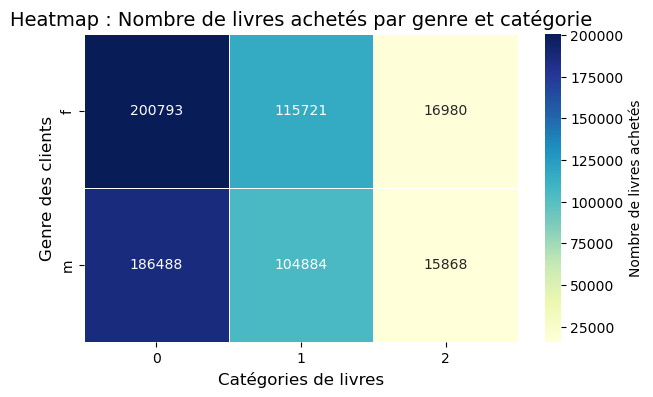

In [71]:
# Création d'une heatmap pour observer la corrélation entre le genre et les catégories de livres acheté.
plt.figure(figsize=(7, 4))
sns.heatmap(
    table_sex_categ, 
    annot=True,      # Afficher les valeurs dans les cellules
    fmt="d",         # Format des annotations (entiers)
    cmap="YlGnBu",   # Palette de couleurs
    linewidths=0.5,  # Espacement des lignes
    cbar_kws={'label': 'Nombre de livres achetés'}  # Légende de la barre
)

# Ajouter un titre et labels
plt.title("Heatmap : Nombre de livres achetés par genre et catégorie", fontsize=14)
plt.xlabel("Catégories de livres", fontsize=12)
plt.ylabel("Genre des clients", fontsize=12)

# Afficher la heatmap
plt.show()

In [72]:
#Test de Chi-2
chi2, p_value, dof, expected = chi2_contingency(table_sex_categ)

# Résultats
print("=== Test du Chi-2 ===")
print(f"Statistique du Chi-2 : {chi2:.5f}")
print(f"p-valeur : {p_value:.5f}")
print(f"Degrés de liberté : {dof}")
print("\n=== Fréquences attendues ===")
print(expected)

# Interprétation
if p_value < 0.05:
    print("\nConclusion : Il existe une association significative entre le genre et les catégories de livres (p.value < 0.05).")
else:
    print("\nConclusion : Aucune association significative détectée entre le genre et les catégories de livres (p.value >= 0.05).")


=== Test du Chi-2 ===
Statistique du Chi-2 : 22.66857
p-valeur : 0.00001
Degrés de liberté : 2

=== Fréquences attendues ===
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]

Conclusion : Il existe une association significative entre le genre et les catégories de livres (p.value < 0.05).


<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">3.2 - Lien entre l'âge des clients et le montant total des achats</h3>
</div>

In [73]:
# Calcul de l'âge des clients
current_year = datetime.now().year
df_clients_transactions['age'] = current_year - df_clients_transactions['birth']

In [74]:
#On fusionne avec les données de CA clients
df_clients_unique = df_clients_transactions[['client_id', 'sex', 'age']].drop_duplicates(subset='client_id')

df_ventes_clients_enrichi = df_ventes_clients.merge(
    df_clients_unique,
    on='client_id',  # Colonne commune
    how='left'  # Fusion gauche pour conserver tous les clients de df_ventes_clients
)

# Vérification du résultat
df_ventes_clients_enrichi.head()

client_id  CA_client  nbre_produits  z_score_vente sex  age
0    c_2140    5260.18            405           1.04   f   48
1    c_3263    5276.87            403           1.03   f   40
2    c_2595    4959.66            398           1.01   m   51
3    c_2077    4848.06            386           0.98   f   41
4    c_1637    4798.83            384           0.97   f   37

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">3.2.1 - Analyse de la distrubition de l'âge des clients</h4>
</div>

In [75]:
# Calculer des statistiques descriptives de la variable âge
mean_age = df_ventes_clients_enrichi['age'].mean()
median_age = df_ventes_clients_enrichi['age'].median()
std_age = df_ventes_clients_enrichi['age'].std()
variance_age = df_ventes_clients_enrichi['age'].var()

# Afficher les résultats des statistiques descriptives
print(f"Moyenne de l'âge : {mean_age:.2f}")
print(f"Médiane de l'âge : {median_age:.2f}")
print(f"Écart-type de l'âge : {std_age:.2f}")
print(f"Variance de l'âge : {variance_age:.2f}")

Moyenne de l'âge : 46.74
Médiane de l'âge : 46.00
Écart-type de l'âge : 16.91
Variance de l'âge : 285.97


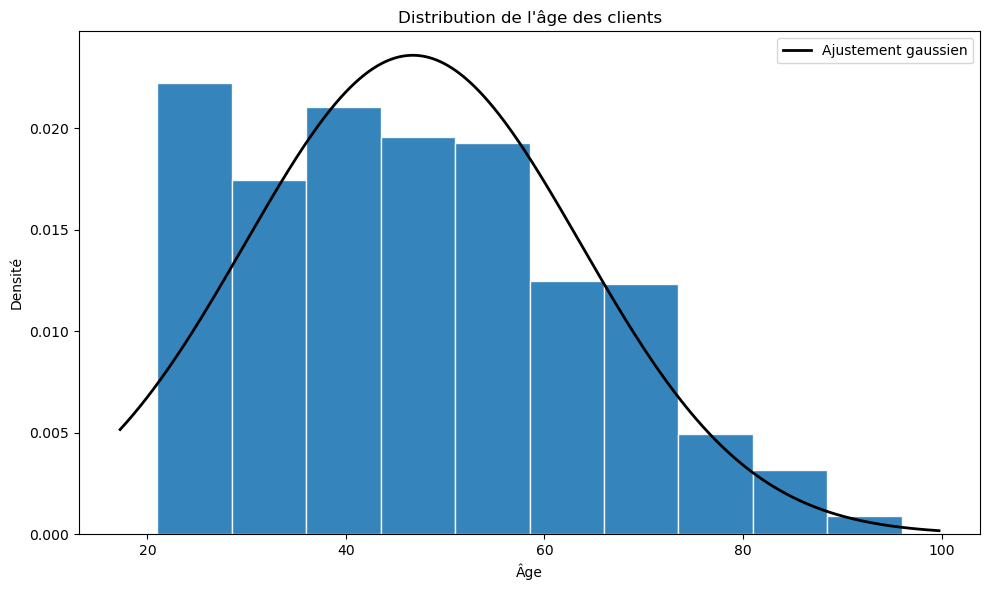

In [76]:
# Visualisation de la distribution de l'âge des clients
plt.figure(figsize=(10, 6))
plt.hist(df_ventes_clients_enrichi['age'], bins=10, density=True, color='#1f77b4', edgecolor='white', alpha=0.9)

# Ajustement d'une courbe normale
mu, std = norm.fit(df_ventes_clients_enrichi['age'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_ventes_clients_enrichi.shape[0])
p = norm.pdf(x, mu, std)

# Ajouter la courbe normale ajustée
plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")
plt.legend()

# Ajouter un titre et des étiquettes
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Densité")

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="background:#FFEEDA;padding:10px;">
    La courbe de densité montre une distribution asymétrique avec un pic (mode) autour de 40-50 ans. Cela suggère qu'une majorité des clients se situent dans cette tranche d'âge.<br/>
<strong>La distribution n'est pas gaussienne (normale), car elle n'a pas de forme symétrique en cloche.</strong>


<ul><strong>Testons la normalité des données :</strong>
    <li>Hypothèse nulle (𝐻0) : Les données d'âge suivent une distribution normale.</li>
    <li>Hypothèse alternative (𝐻1): Les données d'âge ne suivent pas une distribution normale.</li>
</ul>
Notre échantillon étant de grande taille, nous utiliserons le test de Kolmogorov-Smirnov, plutôt que celui de Shapiro-Wilk.
</div>

In [77]:
#Test pour vérifier la normalité des données

# Normalisation des données pour le test KS
normalized_age = (df_ventes_clients_enrichi['age'] - df_ventes_clients_enrichi['age'].mean()) / df_ventes_clients_enrichi['age'].std()

# Effectuer le test de Kolmogorov-Smirnov
stat, p_value = kstest(normalized_age, 'norm')

# Afficher les résultats
print("=== Test de Kolmogorov-Smirnov ===")
print(f"Statistique du test : {stat:.4f}")
print(f"P-valeur : {p_value:.4f}")

if p_value > 0.05:
    print("Les données de 'age' suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les données de 'age' ne suivent pas une distribution normale (on rejette H0).")


=== Test de Kolmogorov-Smirnov ===
Statistique du test : 0.0640
P-valeur : 0.0000
Les données de 'age' ne suivent pas une distribution normale (on rejette H0).


<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">3.2.2 - Analyse de la distribution des montants total d'achats</h4>
</div>

In [78]:
# Calcul des statistiques descriptives pour 'CA_client'
mean_CA = df_ventes_clients_enrichi['CA_client'].mean()
median_CA = df_ventes_clients_enrichi['CA_client'].median()
std_CA = df_ventes_clients_enrichi['CA_client'].std()
variance_CA = df_ventes_clients_enrichi['CA_client'].var()

# Afficher les résultats des statistiques descriptives
print(f"Moyenne du CA : {mean_CA:.2f}")
print(f"Médiane du CA : {median_CA:.2f}")
print(f"Écart-type du CA : {std_CA:.2f}")
print(f"Variance du CA : {variance_CA:.2f}")

Moyenne du CA : 1296.34
Médiane du CA : 1045.59
Écart-type du CA : 958.40
Variance du CA : 918539.27


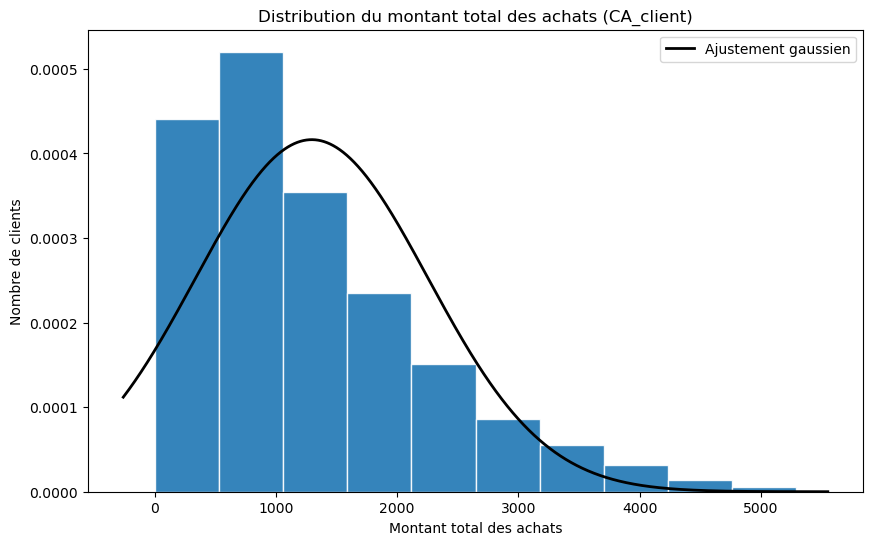

In [79]:
# Visualisation de la distribution de 'CA_client'
plt.figure(figsize=(10, 6))
plt.hist(df_ventes_clients_enrichi['CA_client'], bins=10, density=True, color='#1f77b4', edgecolor='white', alpha=0.9)

mu, std = norm.fit(df_ventes_clients_enrichi['CA_client'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax, df_ventes_clients_enrichi.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")
plt.legend()

plt.title("Distribution du montant total des achats (CA_client)")
plt.xlabel("Montant total des achats")
plt.ylabel("Nombre de clients")

# Afficher le graphique
plt.show()

<div style="background:#FFEEDA;padding:10px;">
Le graphique montre une asymétrie à droite avec une queue étendue vers les montants élevés. Notre distribution ne suit pas un alignement gaussien.
<br/>

<ul><strong>Testons la normalité des données :</strong>
    <li>Hypothèse nulle (𝐻0) : Les données de CA_client suivent une distribution normale.</li>
    <li>Hypothèse alternative (𝐻1): Les données de CA_client ne suivent pas une distribution normale.</li>
</ul>
Notre échantillon étant de grande taille, nous utiliserons le test de Kolmogorov-Smirnov, plutôt que celui de Shapiro-Wilk.
</div>

In [80]:
# Test de vérification de la normalité des données

normalized_data = (df_ventes_clients_enrichi['CA_client'] - df_ventes_clients_enrichi['CA_client'].mean()) / df_ventes_clients_enrichi['CA_client'].std()

# Effectuer le test de Kolmogorov-Smirnov
stat, p_value = kstest(normalized_data, 'norm')

# Afficher les résultats
print(f"Statistique du test KS : {stat:.4f}")
print(f"P-valeur : {p_value:.4f}")

if p_value > 0.05:
    print("Les données suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0).")


Statistique du test KS : 0.1059
P-valeur : 0.0000
Les données ne suivent pas une distribution normale (on rejette H0).


<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">3.2.3 - Analyse de la corrélation âge et montant total des achats</h4>
</div>

<div style="background:#FFEEDA;padding:10px;">Les variables sont quantitatives et ne suivent pas une distribution normale. On utilise donc le Test de Spearman pour déterminer la corrélation.

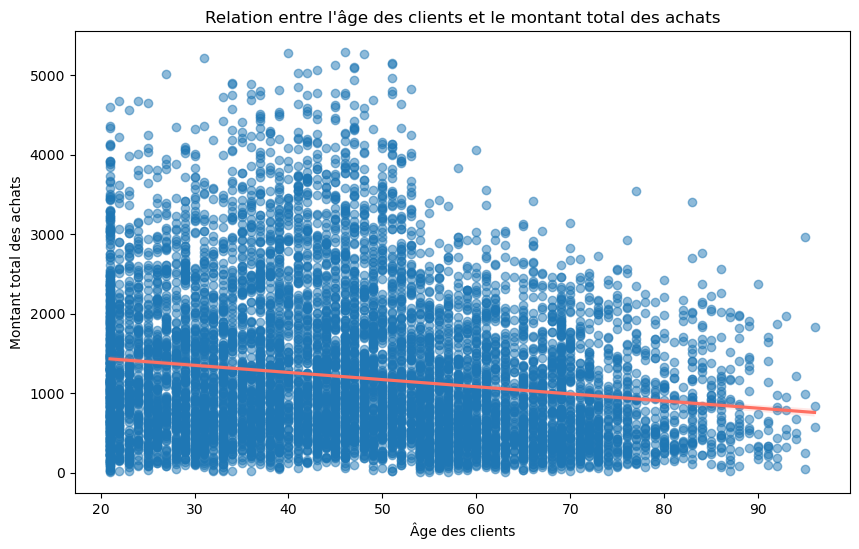

Coefficient de corrélation de Spearman: -0.18453804793783096
Valeur p: 1.0212910436382683e-66


In [81]:
# Test de spearman
ages = df_ventes_clients_enrichi['age']
montant_achats = df_ventes_clients_enrichi['CA_client']

# Visualisation de la tendance avec un scatter plot et une droite de tendance
plt.figure(figsize=(10, 6))
sns.regplot(
    x=ages, 
    y=montant_achats, 
    robust=True, 
    line_kws=dict(color="#FF6F61"),        # Couleur de la droite de tendance
    scatter_kws=dict(color="#1f77b4", alpha=0.5)  # Couleur des points
)
plt.title("Relation entre l'âge des clients et le montant total des achats")
plt.xlabel("Âge des clients")
plt.ylabel("Montant total des achats")
plt.show()

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(ages, montant_achats)

# Afficher les résultats
print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

<div style="background:#FFEEDA;padding:10px;">La corrélation, représenté par une petite p.value, est statistiquement significative (grâce à la très petite valeur p), il est très peu probable que cette corrélation soit due au hasard.
<br/>Mais la force de la corrélation est faible (-0.18) entre l'âge des clients et le montant total de leurs achats.
Cela signifie que lorsque l'âge augmente, le montant total des achats tend à diminuer. Cependant, comme le coefficient est proche de 0, la relation est faible.

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">3.3 - Lien entre l'âge des clients et la fréquence d’achat</h3>
</div>

In [82]:
#On détermine la fréquence d'achat par client
# Calculer le nombre de transactions uniques par client
transactions_par_client = df_clients_transactions.groupby('client_id').agg(
    transactions=('session_id', 'nunique'),
    sex=('sex', 'first'),
    age=('age', 'first')
).reset_index()


transactions_par_client.head()

client_id  transactions sex  age
0       c_1            34   m   70
1      c_10            34   m   69
2     c_100             5   m   33
3    c_1000            94   f   59
4    c_1001            47   m   43

<div style="background:#FFEEDA;padding:10px;">
   On observe à nouveau des différences de tendances par tranche d'âge avec :
    <ul>
        <li><strong>Les 2035 ans : </strong>avec une faible fréquence d'achat</li>
        <li><strong>Les 35-55 ans : </strong>Fréquence d'achat plus élevé</li>
        <li><strong>Les plus de 55ans : </strong>Fréquence d'achat décroissante sur cette tranche d'âge.</li>
    </ul>
    </div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">3.3.1 - Analyse de la distrubition de la fréquence d'achat</h4>
</div>

In [83]:
# Calcul des statistiques descriptives pour la fréquence d'achat
mean_FA = transactions_par_client['transactions'].mean()
median_FA = transactions_par_client['transactions'].median()
std_FA = transactions_par_client['transactions'].std()
variance_FA = transactions_par_client['transactions'].var()

# Afficher les résultats des statistiques descriptives
print(f"Moyenne de la fréquence d'achat : {mean_FA:.2f}")
print(f"Médiane de la fréquence d'achat : {median_FA:.2f}")
print(f"Écart-type de la fréquence d'achat : {std_FA:.2f}")
print(f"Variance de la fréquence d'achat : {variance_FA:.2f}")

Moyenne de la fréquence d'achat : 37.51
Médiane de la fréquence d'achat : 27.00
Écart-type de la fréquence d'achat : 30.90
Variance de la fréquence d'achat : 954.74


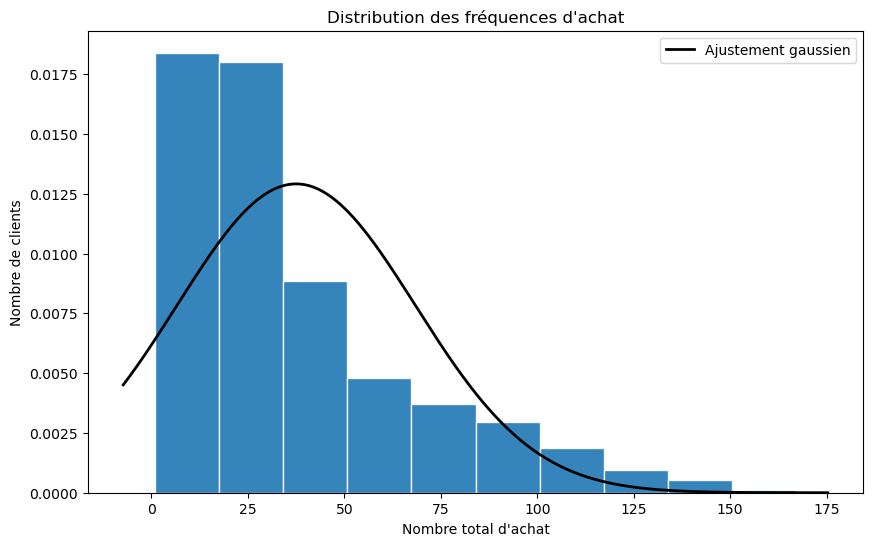

In [84]:
# Visualisation de la distribution de la fréquence d'achat
plt.figure(figsize=(10, 6))
plt.hist(transactions_par_client['transactions'], bins=10, density=True, color='#1f77b4', edgecolor='white', alpha=0.9)

mu, std = norm.fit(transactions_par_client['transactions'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax, transactions_par_client.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")
plt.legend()

plt.title("Distribution des fréquences d'achat")
plt.xlabel("Nombre total d'achat")
plt.ylabel("Nombre de clients")

# Afficher le graphique
plt.show()

In [85]:
# Test de vérification de la normalité des données

normalized_data = (transactions_par_client['transactions'] - transactions_par_client['transactions'].mean()) / transactions_par_client['transactions'].std()

# Effectuer le test de Kolmogorov-Smirnov
stat, p_value = kstest(normalized_data, 'norm')

# Afficher les résultats
print(f"Statistique du test KS : {stat:.4f}")
print(f"P-valeur : {p_value:.4f}")

if p_value > 0.05:
    print("Les données suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0).")

Statistique du test KS : 0.1523
P-valeur : 0.0000
Les données ne suivent pas une distribution normale (on rejette H0).


<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">3.3.2 - Analyse de la corrélation entre âge et fréquence d'achat</h4>
</div>

<div style="background:#FFEEDA;padding:10px;">Les variables sont quantitatives et ne suivent pas une distribution normale. On utilise donc le Test de Spearman pour déterminer la corrélation.

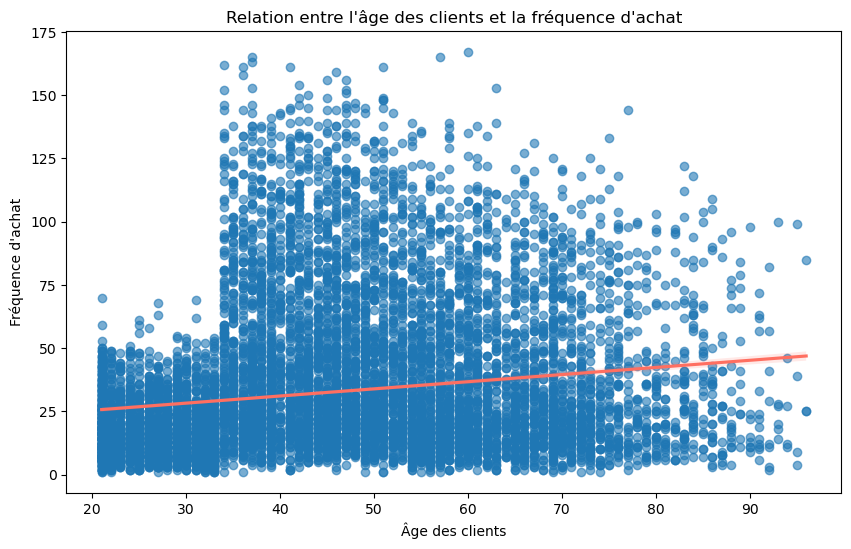

Coefficient de corrélation de Spearman: 0.21196373259671872
Valeur p: 6.629168433162815e-88


In [86]:
# Test de spearman
ages = transactions_par_client['age']
transactions = transactions_par_client['transactions']

# Visualisation de la tendance avec un scatter plot et une droite de tendance
plt.figure(figsize=(10, 6))
sns.regplot(
    x=ages, 
    y=transactions, 
    robust=True, 
    line_kws=dict(color="#FF6F61"),        # Couleur de la droite de tendance
    scatter_kws=dict(color="#1f77b4", alpha=0.6)  # Couleur des points
)
plt.title("Relation entre l'âge des clients et la fréquence d'achat")
plt.xlabel("Âge des clients")
plt.ylabel("Fréquence d'achat")
plt.show()

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(ages, transactions)

# Afficher les résultats
print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

<div style="background:#FFEEDA;padding:10px;">
    <ul>
        <li>Coefficient de corrélation de Spearman de 0.212. Valeur positive légèrement supérieure à 0, indique une corrélation monotone faible mais positive. En d'autres termes, plus l'âge des clients augmente, plus leur fréquence d'achat a tendance à augmenter légèrement.</li>
        <li>La valeur p extrêmement petite (>0,05) montre que cette corrélation est hautement significative statistiquement</li>
    </ul>
    </div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">3.4 - Lien entre l'âge des clients et la taille du panier moyen</h3>
</div>

In [87]:
df_clients_transactions.head()

id_prod                       date session_id client_id  price  categ  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329  11.99      0   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664  19.37      0   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   4.50      0   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   6.55      0   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  16.49      0   

     month sex  birth  age  
0  2021-03   f   1967   58  
1  2021-03   m   1960   65  
2  2021-03   m   1988   37  
3  2021-03   f   1989   36  
4  2021-03   f   1956   69

In [88]:
# Calculer la taille du panier par session (en CA)
df_panier = df_clients_transactions.groupby('session_id').agg(
    CA_panier=('price', 'sum'),  # Somme des prix par session
    client_id=('client_id', 'first'),
    sex=('sex', 'first'),
    age=('age', 'first')
).reset_index()

df_panier.head()

session_id  CA_panier client_id sex  age
0        s_1      11.99     c_329   f   58
1       s_10      26.99    c_2218   f   55
2      s_100      33.72    c_3854   f   47
3     s_1000      39.22    c_1014   m   36
4    s_10000      41.49     c_476   f   36

In [89]:
# Calculer la taille moyenne des paniers par clients
df_panier_moyen = df_panier.groupby('client_id').agg(
    panier_moyen=('CA_panier', 'mean'),  # Moyenne des produits par session
    age=('age', 'first'),                   # Garder l'âge du client
    sex=('sex', 'first')                    # Garder le sexe du client
).reset_index()

df_panier_moyen.head()

client_id  panier_moyen  age sex
0       c_1     18.500588   70   m
1      c_10     39.811765   69   m
2     c_100     50.970000   33   m
3    c_1000     24.381702   59   f
4    c_1001     38.805319   43   m

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">3.4.1 - Analyse de la distrubition de la taille du panier moyen</h4>
</div>

In [90]:
# Calcul des statistiques descriptives pour 'CA_client'
mean_CA_moyen = df_panier_moyen['panier_moyen'].mean()
median_CA_moyen = df_panier_moyen['panier_moyen'].median()
std_CA_moyen = df_panier_moyen['panier_moyen'].std()
variance_CA_moyen = df_panier_moyen['panier_moyen'].var()

# Afficher les résultats des statistiques descriptives
print(f"Moyenne du panier moyen : {mean_CA_moyen:.2f}")
print(f"Médiane du panier moyen : {median_CA_moyen:.2f}")
print(f"Écart-type du panier moyen : {std_CA_moyen:.2f}")
print(f"Variance du panier moyen : {variance_CA_moyen:.2f}")


Moyenne du panier moyen : 40.40
Médiane du panier moyen : 32.34
Écart-type du panier moyen : 22.76
Variance du panier moyen : 518.20


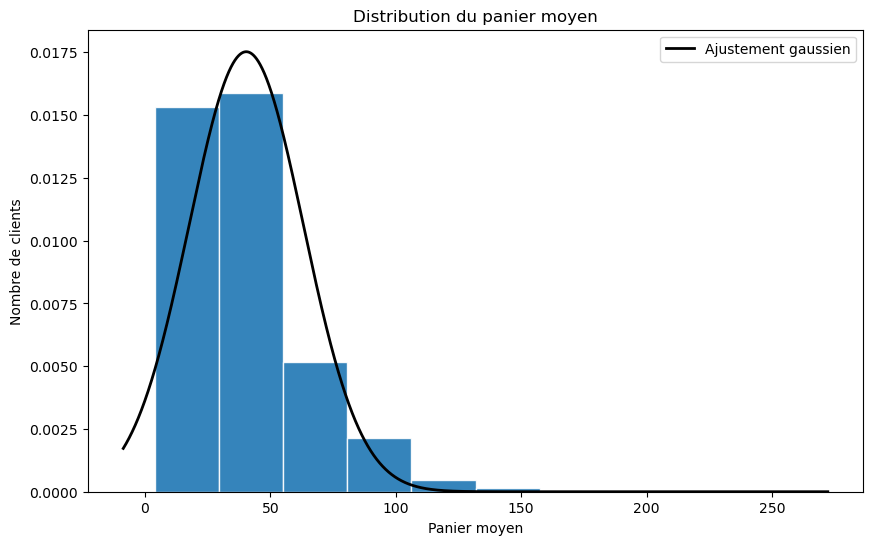

In [91]:
# Visualisation de la distribution de la fréquence d'achat
plt.figure(figsize=(10, 6))
plt.hist(df_panier_moyen['panier_moyen'], bins=10, density=True, color='#1f77b4', edgecolor='white' ,alpha=0.9)

mu, std = norm.fit(df_panier_moyen['panier_moyen'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax, df_panier_moyen.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")
plt.legend()

plt.title("Distribution du panier moyen")
plt.xlabel("Panier moyen")
plt.ylabel("Nombre de clients")

# Afficher le graphique
plt.show()

In [92]:
# Test de vérification de la normalité des données

normalized_data = (df_panier_moyen['panier_moyen'] - df_panier_moyen['panier_moyen'].mean()) / df_panier_moyen['panier_moyen'].std()

# Effectuer le test de Kolmogorov-Smirnov
stat, p_value = kstest(normalized_data, 'norm')

# Afficher les résultats
print(f"Statistique du test KS : {stat:.4f}")
print(f"P-valeur : {p_value:.4f}")

if p_value > 0.05:
    print("Les données suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0).")

Statistique du test KS : 0.1875
P-valeur : 0.0000
Les données ne suivent pas une distribution normale (on rejette H0).


<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">3.4.2 - Analyse de la corrélation entre âge et taille du panier moyen</h4>
</div>

<div style="background:#FFEEDA;padding:10px;">Les variables sont quantitatives et ne suivent pas une distribution normale. On utilise donc le Test de Spearman pour déterminer la corrélation.

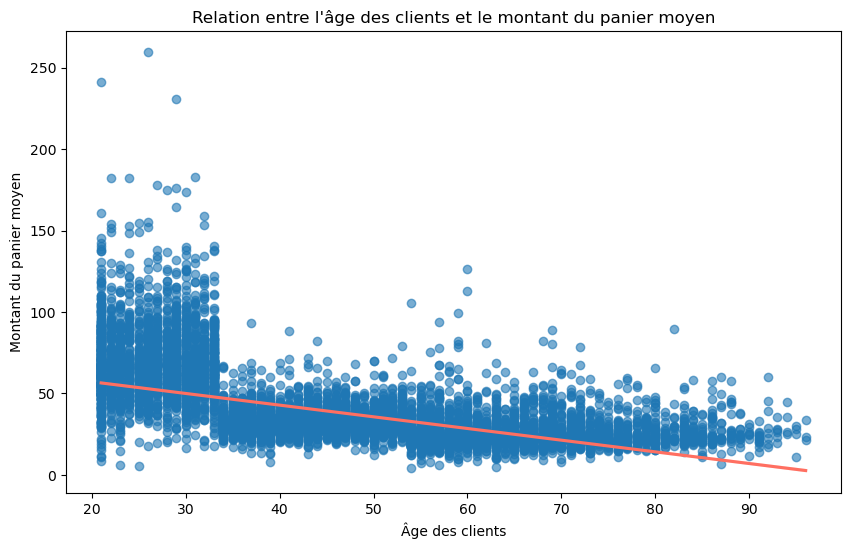

Coefficient de corrélation de Spearman: -0.700550693511482
Valeur p: 0.0


In [93]:
# Test de spearman
ages = df_panier_moyen['age']
panier_moyen = df_panier_moyen['panier_moyen']

# Visualisation de la tendance avec un scatter plot et une droite de tendance
plt.figure(figsize=(10, 6))
sns.regplot(
    x=ages, 
    y=panier_moyen, 
    robust=True, 
    line_kws=dict(color="#FF6F61"),        # Couleur de la droite de tendance
    scatter_kws=dict(color="#1f77b4", alpha=0.6)  # Couleur des points
)
plt.title("Relation entre l'âge des clients et le montant du panier moyen")
plt.xlabel("Âge des clients")
plt.ylabel("Montant du panier moyen")
plt.show()

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(ages, panier_moyen)

# Afficher les résultats
print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

<div style="background:#FFEEDA;padding:10px;">
    <ul>
        <li>Coefficient de corrélation de Spearman de -0,701. Cette valeur montre une corrélation monotone forte et négative. En d'autres termes, plus l'âge des clients augmente,plus le montant moyen de leur panier diminue.</li>
        <li>La valeur p de 0,0 (>0,05) montre que cette corrélation est hautement significative statistiquement</li>
    </ul>
    </div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">3.5 - Lien entre l'âge des clients et la catégorie des livres achetés</h3>
</div>

In [94]:
# Créer une table de contingence : nombre de livres achetés par âge et par catégorie
table_age_categ = df_clients_transactions.groupby(['age', 'categ'], observed=True).size().unstack(fill_value=0)

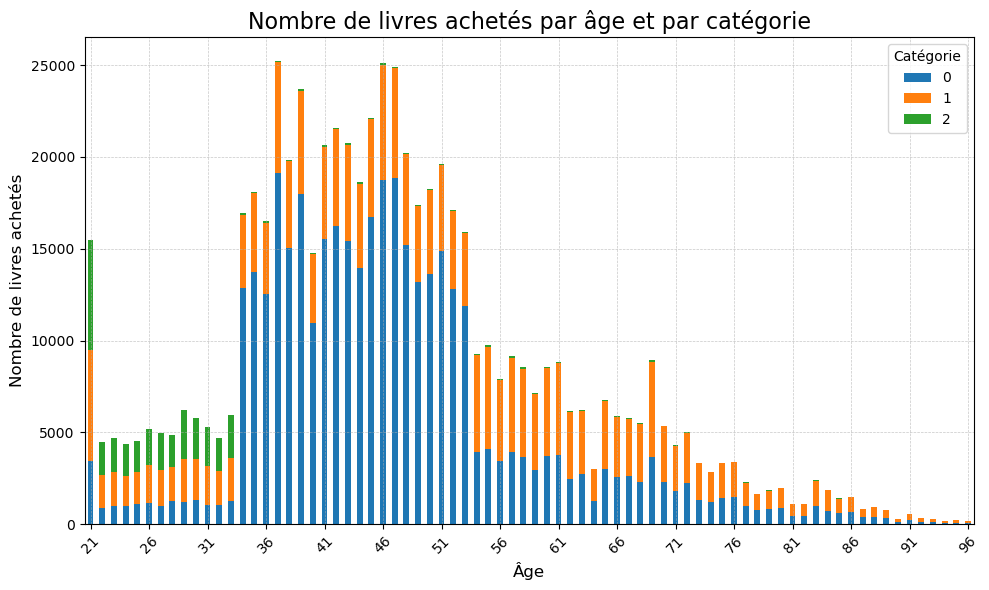

In [95]:
# Créer un graphique en barres empilées
ax = table_age_categ.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personnaliser les ticks de l'axe X pour n'afficher que tous les 5 ans
ticks = ax.get_xticks()  # Obtenir les indices des ticks actuels
labels = table_age_categ.index  # Obtenir les âges actuels
selected_ticks = [tick for i, tick in enumerate(ticks) if i % 5 == 0]  # Garder un tick sur 5
selected_labels = [label for i, label in enumerate(labels) if i % 5 == 0]  # Garder une étiquette sur 5

ax.set_xticks(selected_ticks)  # Appliquer les ticks sélectionnés
ax.set_xticklabels(selected_labels, rotation=45, fontsize=10)  # Appliquer les étiquettes sélectionnées

# Ajouter une grille avec des lignes plus claires
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Ajouter des labels et un titre
plt.title("Nombre de livres achetés par âge et par catégorie", fontsize=16)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Nombre de livres achetés", fontsize=12)
plt.legend(title="Catégorie", fontsize=10)

# Ajuster les marges pour une meilleure lisibilité
plt.tight_layout()

# Afficher le graphique
plt.show()

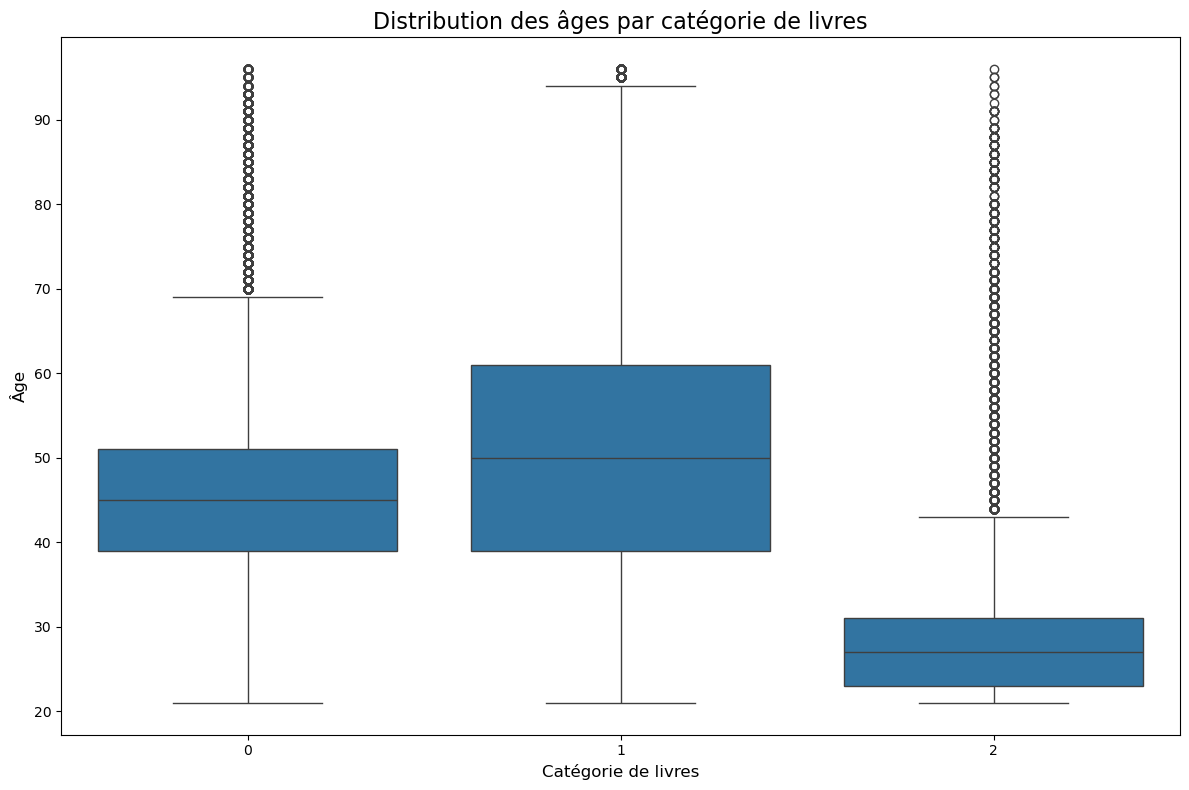

In [96]:
# Créer des boites à moustaches pour observer les catégories de livres achetées selon l'age
plt.figure(figsize=(12, 8))

sns.boxplot(data=df_clients_transactions, x='categ', y='age', color="#1f77b4")

# Ajouter un titre et des étiquettes
plt.title("Distribution des âges par catégorie de livres", fontsize=16)
plt.xlabel("Catégorie de livres", fontsize=12)
plt.ylabel("Âge", fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [97]:
#Calucl des statistiques d'âge par catégories
categ0 = df_clients_transactions[df_clients_transactions['categ'] == 0]['age']
categ1 = df_clients_transactions[df_clients_transactions['categ'] == 1]['age']
categ2 = df_clients_transactions[df_clients_transactions['categ'] == 2]['age']


print("Moyenne d'âge pour la catégorie 0 :", round(np.mean(categ0)))
print("Moyenne d'âge pour la catégorie 1 :", round(np.mean(categ1)))
print("Moyenne d'âge pour la catégorie 2 :", round(np.mean(categ2)))


print("\nVariance d'âge pour la catégorie 0 :", round(np.var(categ0)))
print("Variance d'âge pour la catégorie 1 :", round(np.var(categ1)))
print("Variance d'âge pour la catégorie 2 :", round(np.var(categ2)))

Moyenne d'âge pour la catégorie 0 : 47
Moyenne d'âge pour la catégorie 1 : 51
Moyenne d'âge pour la catégorie 2 : 29

Variance d'âge pour la catégorie 0 : 133
Variance d'âge pour la catégorie 1 : 250
Variance d'âge pour la catégorie 2 : 98


In [98]:
# Test de Levene pour l'égalité des variances
levene_test_stat, levene_p_value = levene(categ0, categ1, categ2)

# Résultats
print("Statistique de Levene:", levene_test_stat)
print("p-valeur:", levene_p_value)

# Analyse des résultats
alpha = 0.05
if levene_p_value < alpha:
    print("Conclusion : Les variances entre les groupes sont significativement différentes (p < 0.05).")
else:
    print("Conclusion : Les variances entre les groupes ne sont pas significativement différentes (p >= 0.05).")

Statistique de Levene: 24651.780367284307
p-valeur: 0.0
Conclusion : Les variances entre les groupes sont significativement différentes (p < 0.05).


<div style="background:#FFEEDA;padding:10px;">
Nos variables sont de types quantitatives continue pour l'âge et qualitative pour les catégories. Nos données ne suivent pas une distribution normale et les variances sont inégales (non constante). Nous utiliserons donc un test de Kruskal-Wallis pour étudier la corrélation entre nos variables.
</div>

In [99]:
# Groupement des âges par catégorie de livres
groupes = [df_clients_transactions[df_clients_transactions['categ'] == categ]['age'] 
           for categ in df_clients_transactions['categ'].unique()]

# Appliquer le test de Kruskal-Wallis
stat, p_value = kruskal(*groupes)

# Afficher les résultats
print(f"Statistique de Kruskal-Wallis : {stat:.5f}")
print(f"P-valeur : {p_value:.5f}")

# Interprétation
if p_value < 0.05:
    print("Conclusion : Il existe un lien significatif entre les âges des clients et les catégories de livres.")
else:
    print("Conclusion : Aucun lien significatif détectée entre les âges des clients et les catégories de livres.")

Statistique de Kruskal-Wallis : 71359.73412
P-valeur : 0.00000
Conclusion : Il existe un lien significatif entre les âges des clients et les catégories de livres.


<div style="background:#FFEEDA;padding:10px;">
  Nos analyses ont permis de faire resortir des comportements d'achats différents selon l'âge des clients, que ce soit en terme de montant ou de fréquence d'achat.
    <br/> Nous avons identifier trois tranches d'âges avec des comportements différents :
    <ul>
        <li><strong>Les 20-35 ans :</strong> Faible fréquence d'achat (et faible quantité) mais avec un panier moyen et un montant total d'achat plus élevé que les autres tranches.</li>
        <li><strong>Les 35-55 ans :</strong>Achète plus souvent et en plus grande quantité. Mais avec des paniers moyen plus petits.</li>
        <li><strong>Les plus de 55 ans :</strong> Comme la tranche précédente, des paniers moyen plus faible, mais la fréquence d'achat tend à diminuer également, et continue de diminuer en suivant l'augmentation de lâge.</li>
    </ul>
    </div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">3.6 - Analyse du chiffre d'affaires par tranches d'âge et sexe</h3>
</div>

In [100]:
# Définir des tranches d'âge détaillées
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]
labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','66-70', '71-75', '76-80', '81-85', '86-90', '91+']

# Assigner les tranches d'âge
df_ventes_clients_enrichi['tranche_age'] = pd.cut(
    df_ventes_clients_enrichi['age'], 
    bins=bins, 
    labels=labels, 
    right=True  # Inclure les limites supérieures dans les tranches
)

In [101]:
# Calcul du CA total par groupe d'âge
table_ca_age = df_ventes_clients_enrichi.groupby('tranche_age', observed=False)['CA_client'].sum().reset_index()
table_ca_age.columns = ['Tranche d\'âge', 'Chiffre d\'affaires']

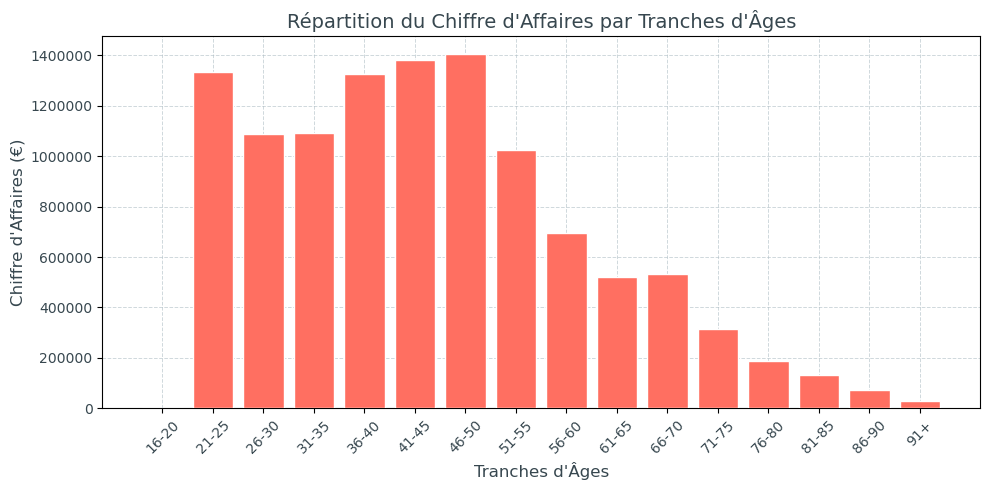

In [102]:
# Graphique répartition du chiffre d'affaire par tranche d'âge

# Convertir 'Chiffre d\'affaires' en numérique
table_ca_age['Chiffre d\'affaires'] = table_ca_age['Chiffre d\'affaires'].replace({' ': '', '€': ''}, regex=True)
table_ca_age['Chiffre d\'affaires'] = pd.to_numeric(table_ca_age['Chiffre d\'affaires'])

# Création de l'histogramme
plt.figure(figsize=(10, 5))
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='#B0BEC5', zorder=0)
plt.bar(
    table_ca_age['Tranche d\'âge'],
    table_ca_age['Chiffre d\'affaires'],
    color='#FF6F61',  # Rouge corail
    edgecolor='white',
    label='Chiffre d\'affaires',
    zorder=3  # Assurez-vous que les barres soient dessinées au-dessus de la grille
)

plt.ticklabel_format(style='plain', axis='y')  # Afficher les valeurs de manière classique

# Ajouter des titres et des labels
plt.title("Répartition du Chiffre d'Affaires par Tranches d'Âges", fontsize=14, color='#37474F')
plt.xlabel("Tranches d'Âges", fontsize=12, color='#37474F')
plt.ylabel("Chiffre d'Affaires (€)", fontsize=12, color='#37474F')
plt.xticks(rotation=45, fontsize=10, color='#37474F')
plt.yticks(fontsize=10, color='#37474F')

plt.tight_layout()
plt.show()

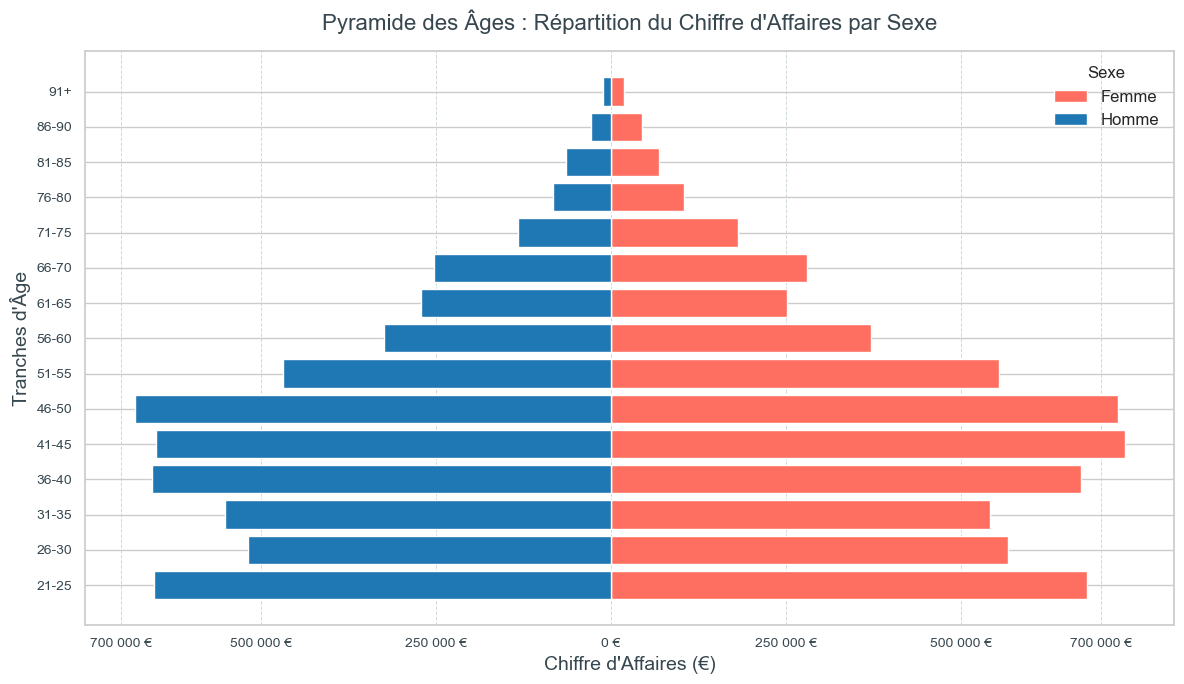

In [103]:
# Pyramide des âges de la répartition du CA par genre
table_ca_age_sexe = df_ventes_clients_enrichi.groupby(['tranche_age', 'sex'], observed=True)['CA_client'].sum().unstack(fill_value=0).reset_index()
table_ca_age_sexe.columns = ['Tranche d\'âge', 'Femme', 'Homme']
table_ca_age_sexe_graph = df_ventes_clients_enrichi.groupby(['tranche_age', 'sex'], observed=True)['CA_client'].sum().unstack(fill_value=0).reset_index()
table_ca_age_sexe_graph.columns = ['Tranche d\'âge', 'Femme', 'Homme']

# Inverser les valeurs des hommes pour les représenter sur le côté gauche
table_ca_age_sexe_graph['Homme'] = -table_ca_age_sexe_graph['Homme']

# Configuration du style du graphique
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))

# Barres pour les femmes
ax.barh(
    table_ca_age_sexe_graph['Tranche d\'âge'], 
    table_ca_age_sexe_graph['Femme'], 
    color='#FF6F61', 
    edgecolor='white', 
    label='Femme'
)

# Barres pour les hommes
ax.barh(
    table_ca_age_sexe_graph['Tranche d\'âge'], 
    table_ca_age_sexe_graph['Homme'], 
    color='#1f77b4', 
    edgecolor='white', 
    label='Homme'
)

# Ajouter des labels
ax.set_title("Pyramide des Âges : Répartition du Chiffre d'Affaires par Sexe", fontsize=16, color='#37474F', pad=15)
ax.set_xlabel("Chiffre d'Affaires (€)", fontsize=14, color='#37474F')
ax.set_ylabel("Tranches d'Âge", fontsize=14, color='#37474F')

# Ajustement des ticks de l'axe X (réduire les labels)
xticks = [-700000,-500000, -250000, 0, 250000, 500000,700000]  # Exemple de valeurs intermédiaires
ax.set_xticks(xticks)
ax.set_xticklabels([f"{abs(x):,}".replace(",", " ") + " €" for x in xticks], fontsize=10, color='#37474F')
ax.tick_params(axis='y', labelsize=10, colors='#37474F')
ax.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6, color='#B0BEC5', axis='x')
ax.legend(title="Sexe", loc="upper right", fontsize=12, title_fontsize=12, frameon=False)

plt.tight_layout()
plt.show()

a